# Выпускной проект "Банки - Анализ оттока клиентов"

## Описание проекта
Региональный банк "Метанпромбанк" столкнулся с проблемой повышенного оттока клиентов. Перед отделом маркетинга стоит задача удержания уходящих клиентов, а для этого необходимо выяснить, какие именно факторы увеличивают вероятность возникновения у клиента желания отказаться от услуг банка. 

### Описание данных
Датасет содержит данные о 10000 клиентов банка:
- `USERID` — идентификатор пользователя
- `score` — баллы кредитного скоринга
- `city` — город (Ярославль, Ростов Великий или Рыбинск)
- `gender` — пол
- `age` — возраст
- `equity` — количество баллов собственности (рассчитывается на основании количества и стоимости активов)
- `balance` — баланс на счёте
- `products` — количество продуктов, которыми пользуется клиент
- `credit_card` — есть ли кредитная карта
- `last_activity` — активный клиент (юридически значимое обращение за последнее время)
- `EST_SALARY` — оценочный доход клиента (рассчитывается на основании поступающих регулярных платежей)
- `сhurn` — признак оттока (1, если клиент выразил желание отказаться от услуг банка)

### Цели проекта
- проведение анализа оттока клиентов банка
- выделение компактных однородных сегментов клиентов, наиболее склонных к уходу
- приведение примеров мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока

### Задачи проекта
Исходя из целей проекта можно выделить три крупных задачи:
- выделение значимых признаков отточности
- формирование наиболее отточных сегментов пользователей на основании выделенных признаков
- составление рекомендаций по проведению мероприятий по удержанию клиентов для каждого сегмента

## Загрузка данных

### Установка и загрузка необходимых библиотек

In [ ]:
# установка библиотеки визуализации пропусков
!pip install missingno

In [1]:
# импорт библиотек
import pandas as pd
import missingno as msno
import numpy as np
import math 

import warnings
warnings.filterwarnings("ignore")

# визуализация
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import seaborn as sns

# проверка статистических гипотез
from scipy import stats as st

### Загрузка данных из файла

In [2]:
link = 'bank_scrooge.csv'

try:
    data = pd.read_csv(link)
    print('Файл успешно загружен')
except:
    print('Ошибка загрузки: путь к файлу не найден')

Файл успешно загружен


## Первичное ознакомление с данными
### Загрузка первых строк таблицы



In [3]:
data.head(10)

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   
5  202305  856.0    Рыбинск      М  56.0       4   863687.24         3   
6  177259  807.0  Ярославль      Ж  39.0       3   405042.44         3   
7  218868  825.0  Ярославль      Ж  38.0       4   458145.40         2   
8  211686  923.0  Ярославль      М  54.0       5  1206337.87         2   
9  133130  906.0  Ярославль      Ж  67.0       0         NaN         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1  
5            1              0   156619.80      0  
6            0              1   103838.32      0  
7            1              1    68085.48      0  
8            1              0   155371.79      0  
9            0              1   238055.53      0

### Загрузка общей информации о таблице

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
print(f'Таблица содержит {data.shape[0]} строк и {data.shape[1]} столбцов.')

Таблица содержит 10000 строк и 12 столбцов.


### Подсчет пропусков

In [6]:
# количество пропусков в каждом столбце
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [7]:
# доля пропусков в столбце от общего количества данных
round(100*data.isna().sum() / len(data), 2)

USERID            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
EST_SALARY        0.00
churn             0.00
dtype: float64

### Подсчет явных и неявных дубликатов

In [8]:
# подсчет явных дубликатов
print('Полных дубликатов в таблице:', data.duplicated().sum())

Полных дубликатов в таблице: 0


Так как единицей информации в таблице является клиент, неявные дубликаты считаем по id клиента.

In [9]:
# создаем список, в который добавим клиентские id, встречающиеся с таблице больше 1 раза

duplicates = []
for i in data['USERID'].value_counts().index:
    if data['USERID'].value_counts()[i] > 1:
        duplicates.append(i)


print('Неявных дубликатов в таблице:', len(duplicates))

Неявных дубликатов в таблице: 73


In [10]:
# вывод первых 20 повторов
data.query('USERID in @duplicates').sort_values(by='USERID').head(20)

USERID  score       city gender   age  equity     balance  products  \
1893  116540  883.0    Рыбинск      Ж  55.0       1   362756.49         3   
7694  116540  887.0  Ярославль      Ж  38.0       0         NaN         1   
7542  117943  880.0  Ярославль      Ж  40.0       0         NaN         1   
4866  117943  855.0    Рыбинск      Ж  32.0       6  1036832.93         4   
5896  120258  905.0  Ярославль      М  30.0       0         NaN         1   
5863  120258  908.0    Рыбинск      Ж  38.0       4  2213581.63         2   
1411  123461  829.0  Ярославль      Ж  59.0       0    96222.44         2   
8638  123461  934.0    Рыбинск      М  34.0       0         NaN         2   
8164  124450  859.0  Ярославль      Ж  38.0       6   516811.20         1   
9775  124450  758.0    Рыбинск      Ж  36.0       0    73574.07         2   
4850  126368  909.0  Ярославль      Ж  30.0       4  1322623.29         2   
5420  126368  832.0    Рыбинск      Ж  33.0       0         NaN         1   
8785  127440  663.0  Ярославль      М   NaN       0         NaN         1   
4443  127440  846.0    Рыбинск      М  66.0       1    57405.67         2   
3988  129785  904.0    Рыбинск      М  33.0       5  2427737.60         3   
9504  129785  949.0  Ярославль      М  43.0       0         NaN         1   
904   131419  934.0  Ярославль      М  35.0       5  2348335.95         2   
2138  131419  739.0    Рыбинск      Ж  37.0       3  1307941.65         3   
7487  140377  930.0    Рыбинск      Ж  34.0       5  1123967.02         1   
1608  140377  802.0  Ярославль      М  26.0       3   539863.29         4   

      credit_card  last_activity  EST_SALARY  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
5863            0              1   160327.77      1  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
8164            1              1    95144.63      1  
9775            0              1    79963.59      0  
4850            0              1   140675.66      1  
5420            0              0   118465.34      0  
8785            1              1   117197.56      0  
4443            0              1    17831.63      0  
3988            0              1   188856.75      1  
9504            1              1   166845.37      0  
904             0              0   217105.13      1  
2138            0              0   103867.47      0  
7487            1              1   148336.26      0  
1608            1              1   112167.83      1

In [11]:
# подсчет количества пропусков в дубликатах
data.query('USERID in @duplicates').isna().sum()

USERID            0
score             0
city              0
gender            0
age              23
equity            0
balance          49
products          0
credit_card       0
last_activity     0
EST_SALARY        0
churn             0
dtype: int64

### Результат первичного ознакомления

Таблица состоит из 10000 строк и 12 столбцов с данными различных типов.

Категориальные данные:
- `city` — город
- `gender` — пол
- `equity` — количество баллов собственности
- `balance` — баланс на счёте
- `products` — количество продуктов, которыми пользуется клиент
- `credit_card` — есть ли кредитная карта
- `last_activity` — активный клиент
- `сhurn` — признак оттока

Последние две категории представлены бинарными данными (отображают наличие или отсутствие признака).

Непрерывные данные:
- `age` — возраст
- `score` — баллы кредитного скоринга
- `balance` — баланс на счёте
- `EST_SALARY` — оценочный доход клиента

Таблица содержит пропуски в столбцах `age` и `balance` (0,26% и 22,95% соответственно). Явных дубликатов в таблице нет. Выявлено 73 неявных дубликата, причем из 26 пропусков в столбце `age` 23 приходятся на дублирующиеся строки.

По результатам первичного ознакомления составлен план предобработки данных:

1. Переименование столбцов:
    - приведение наименований столбцов `USERID` и `EST_SALARY` к конвенциональному виду
    
    
2. Анализ и обработка пропусков:
    - изучение распределения пропусков в столбцах `age` и `balance`
    - изучение зависимости пропусков друг от друга
    - изучение зависимости пропусков от других данных
    - определение типа пропусков по классификации Дональда Рубина
    - принятие решения о методе обработки пропусков  
    
    
3. Анализ и обработка дубликатов:
    - изучение дубликатов
    - принятие решения о методе обработки дубликатов  
    
    
4. Обработка категориальных данных:
    - добавление фиктивных переменных для дальнейшего анализа    
    
    
5. Преобразование типов данных:
    - приведение данных в столбцах `age` и `score` к целочисленному значению
    
    
6. Исследование распределения данных:
    - составление гистограмм
    - изучение выбросов и аномалий
    - обработка выбросов и аномалий

## Предобработка данных
### Переименование столбцов

In [12]:
columns = {'USERID':'user_id',
           'EST_SALARY': 'salary'}

data = data.rename(columns=columns)

### Анализ и обработка пропусков

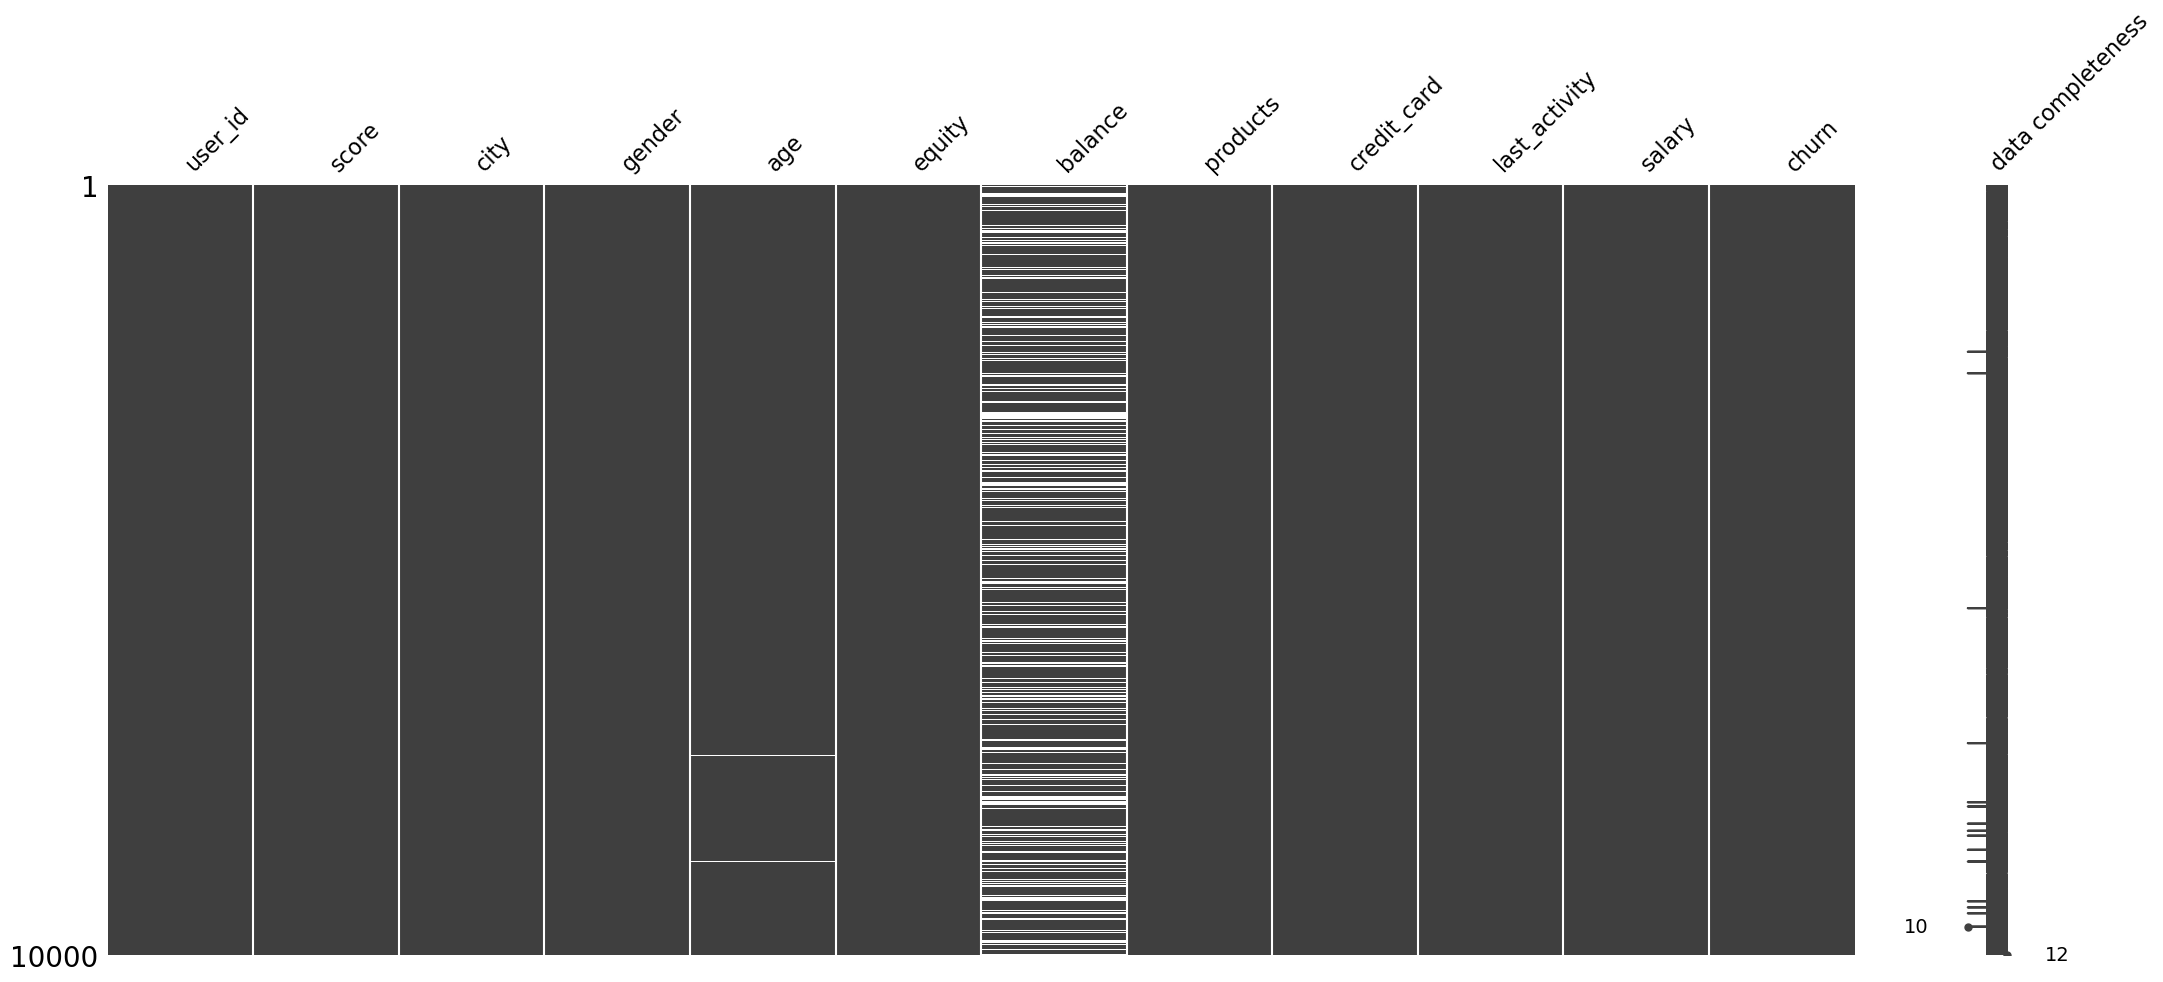

In [13]:
# строим матрицу распределения пропусков
msno.matrix(data, labels=True)
None

Пропусков в столбце `age` слишком мало, чтобы оценить их распределение, а вот в столбце `balance` их достаточно. Исходная таблица, по всей видимости, не отсортирована ни по одному из представленных признаков, поэтому распределение пропусков в столбце `balance` невозможно привязать ни к одному из них. Чтобы не отрисовывать матрицы распределения для каждого столбца, поступим следующим образом:
- выделим отдельный столбец `has_balance` c признаком наличия или отсутствия баланса
- составим тепловую карту по матрице корреляции данного столбца с остальными признаками
- выделим признаки с наибольшей корреляцией
- отрисуем матрицу распределения пропусков с сортировкой по выделенным признакам

In [14]:
# создаем столбец has_balance
data['has_balance'] = data.loc[:,['balance']].apply(lambda x: 0 if math.isnan(x['balance']) else 1, axis=1)

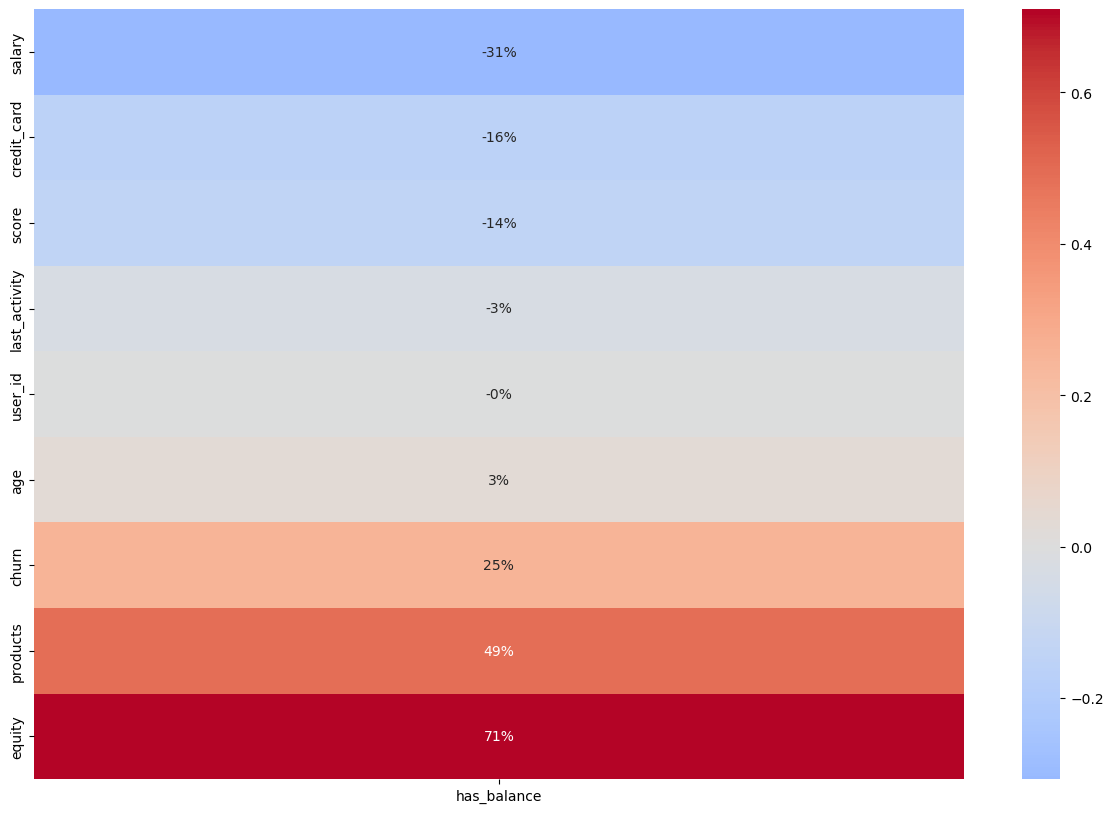

In [15]:
# выводим хитмэп
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr().loc[:,['has_balance']].drop(['has_balance','balance']).sort_values('has_balance'), annot=True, fmt='.0%', cmap='coolwarm', center=0)
plt.show()

Для оценки силы связи воспользуемся шкалой Чеддока:
- слабая — от 0,1 до 0,3
- умеренная — от 0,3 до 0,5
- заметная — от 0,5 до 0,7
- высокая — от 0,7 до 0,9
- весьма высокая (сильная) — от 0,9 до 1,0

Можно выделить следующую связь наличия или отсутствия данных о балансе со другими признаками:
- наличие баллов собственности - высокая корреляция
- количество банковских продуктов - умеренная корреляция
- доход - умеренная обратная корреляция
- признак отточности - слабая корреляция

Построим матрицы распределения пропусков с сортировкой по выделенным столбцам.

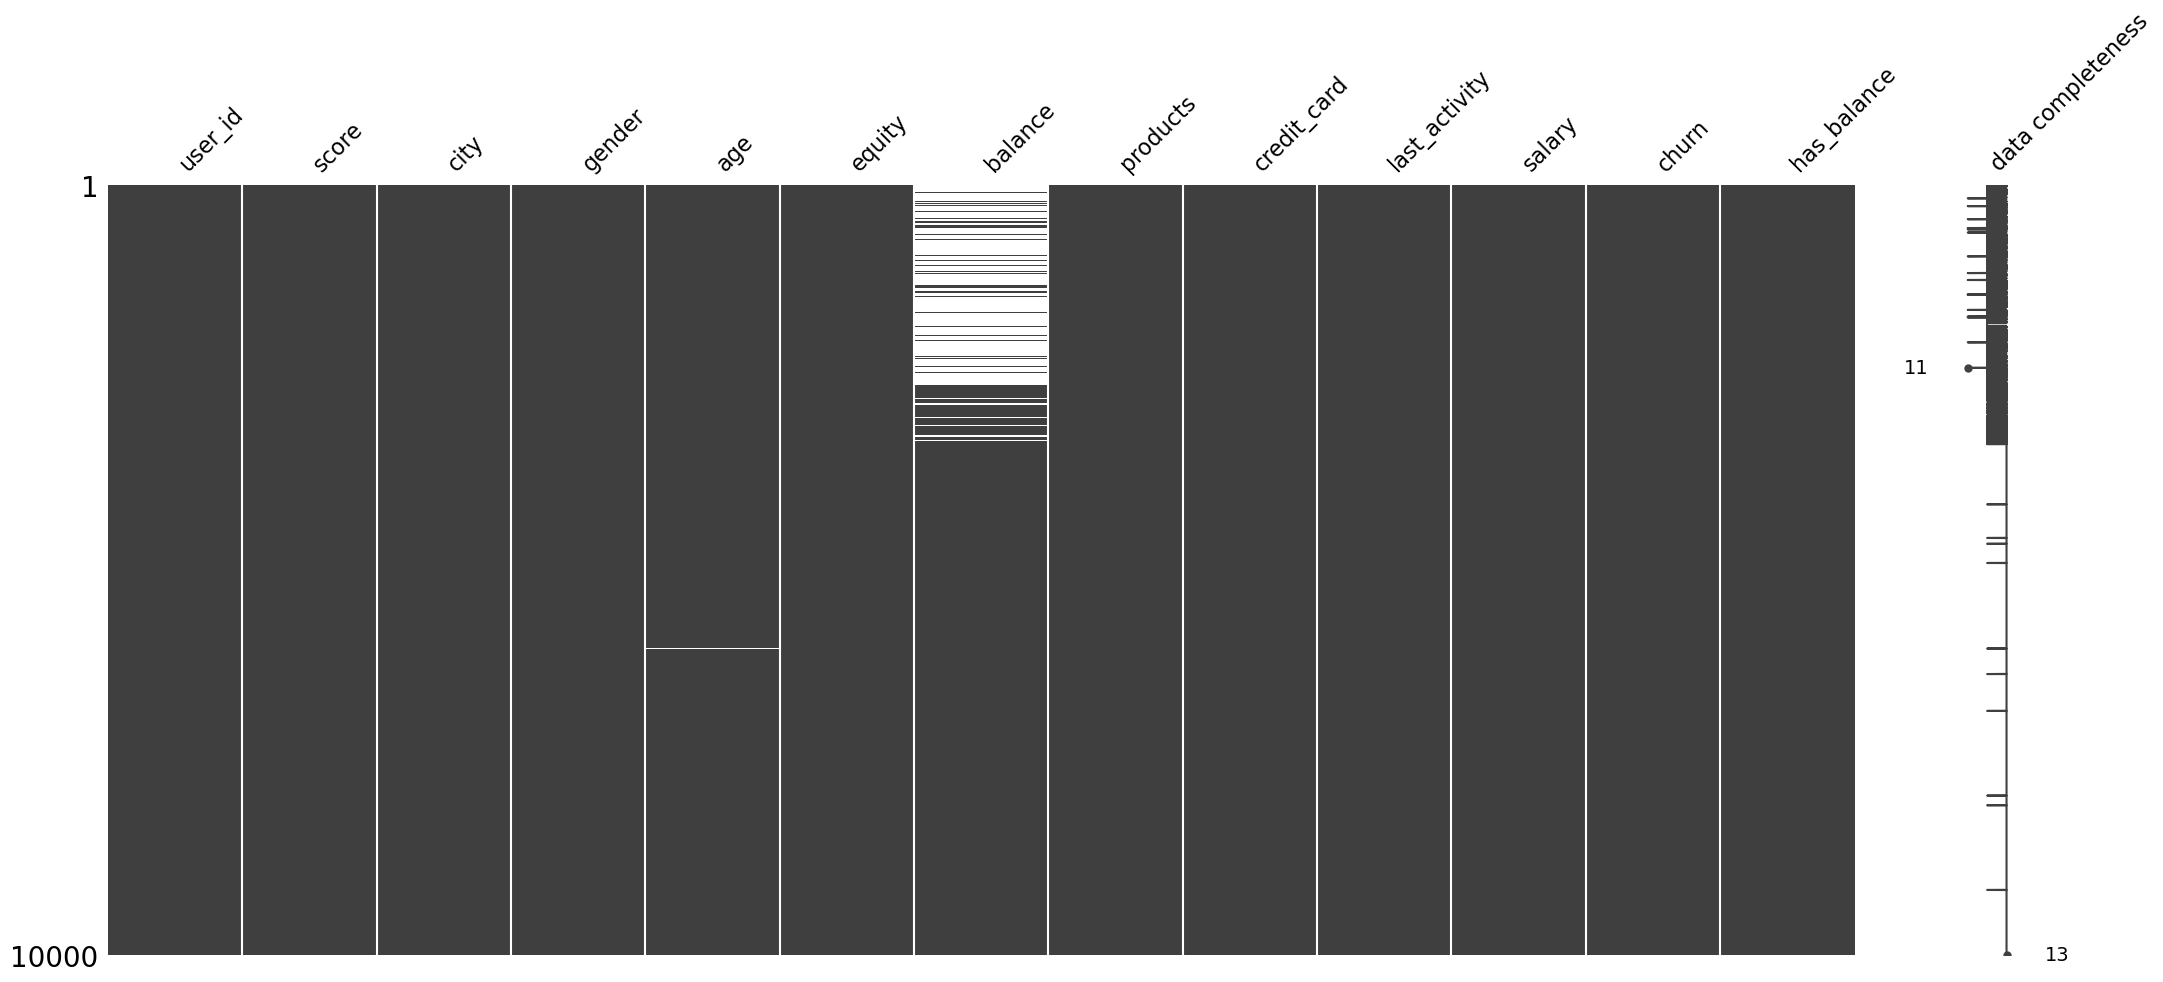

In [16]:
# распределение пропусков с сортировкой по баллам собственности
msno.matrix(data.sort_values('equity', ascending=True), labels=True)
None

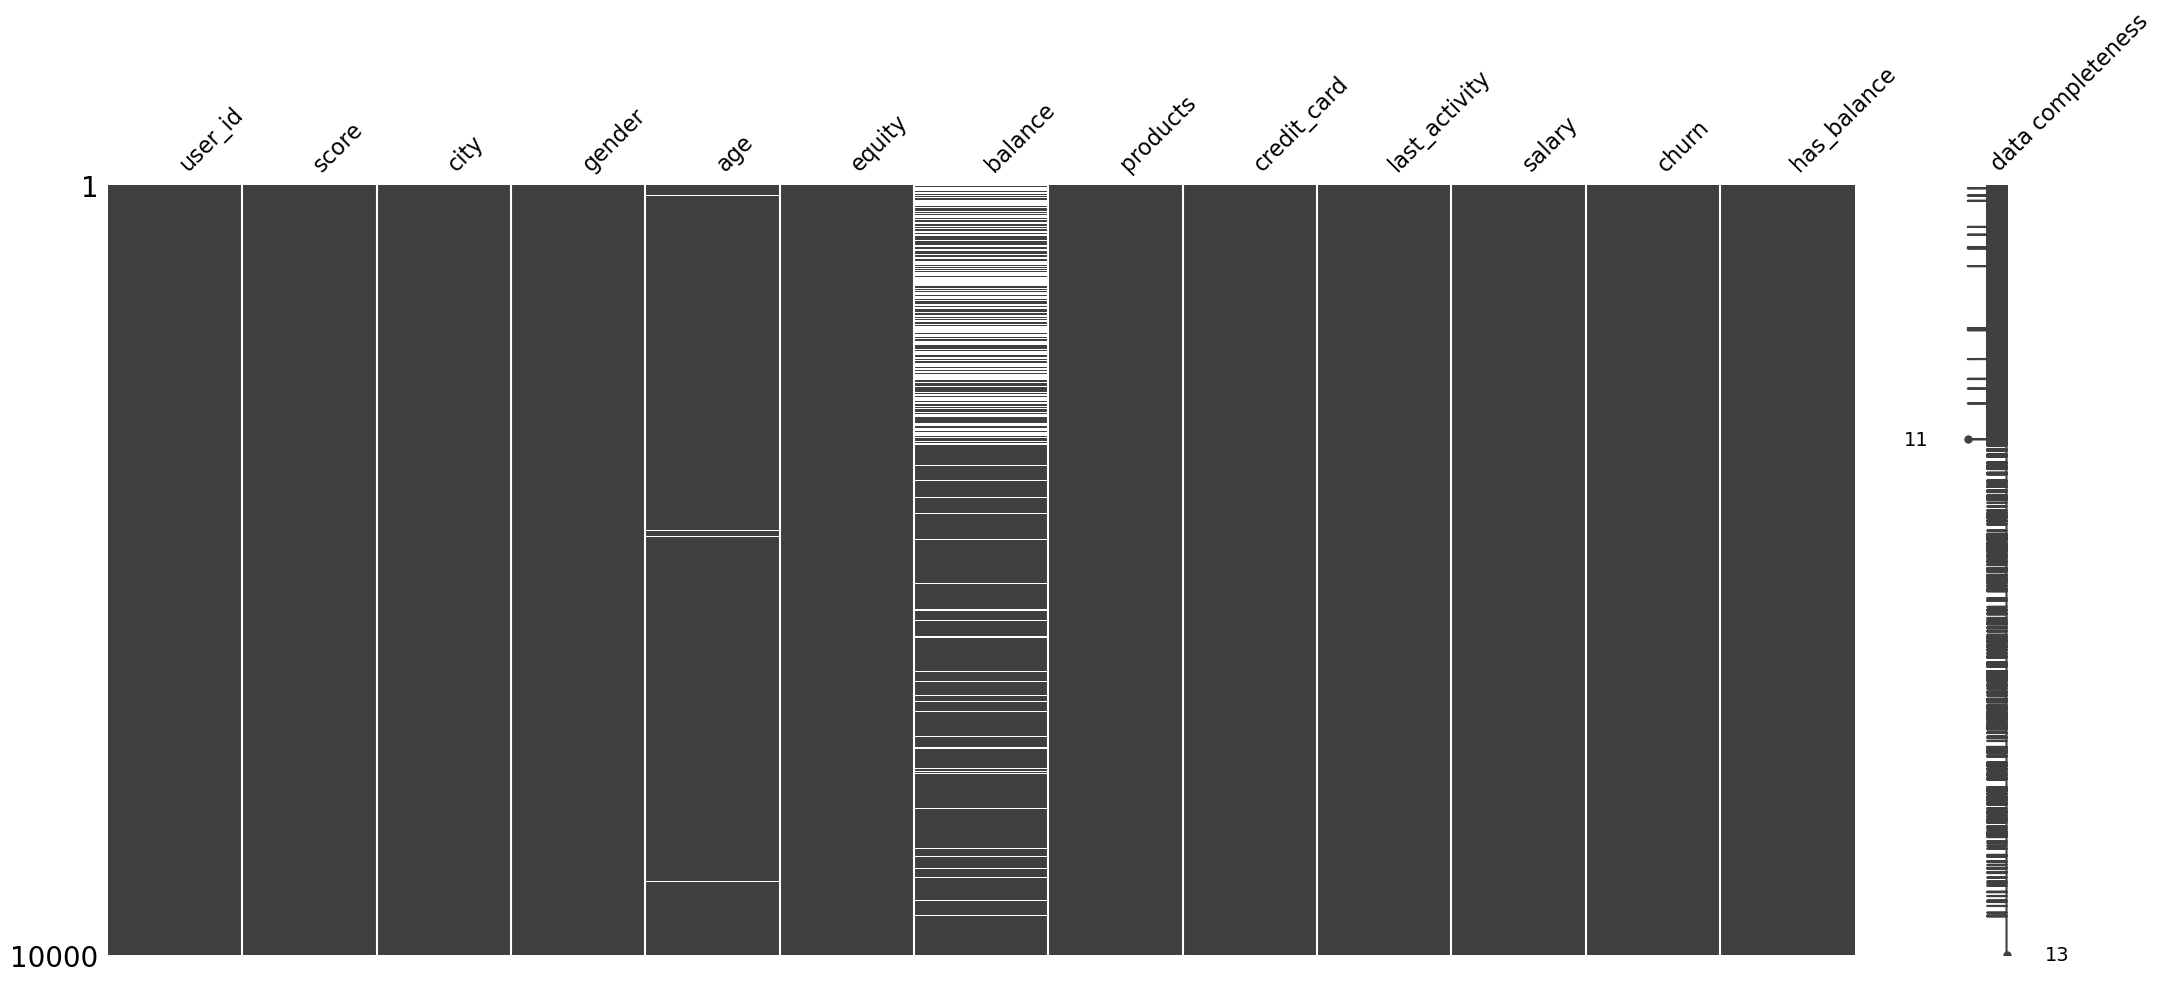

In [17]:
# распределение пропусков с сортировкой по количеству банковских продуктов
msno.matrix(data.sort_values('products', ascending=True), labels=True)
None

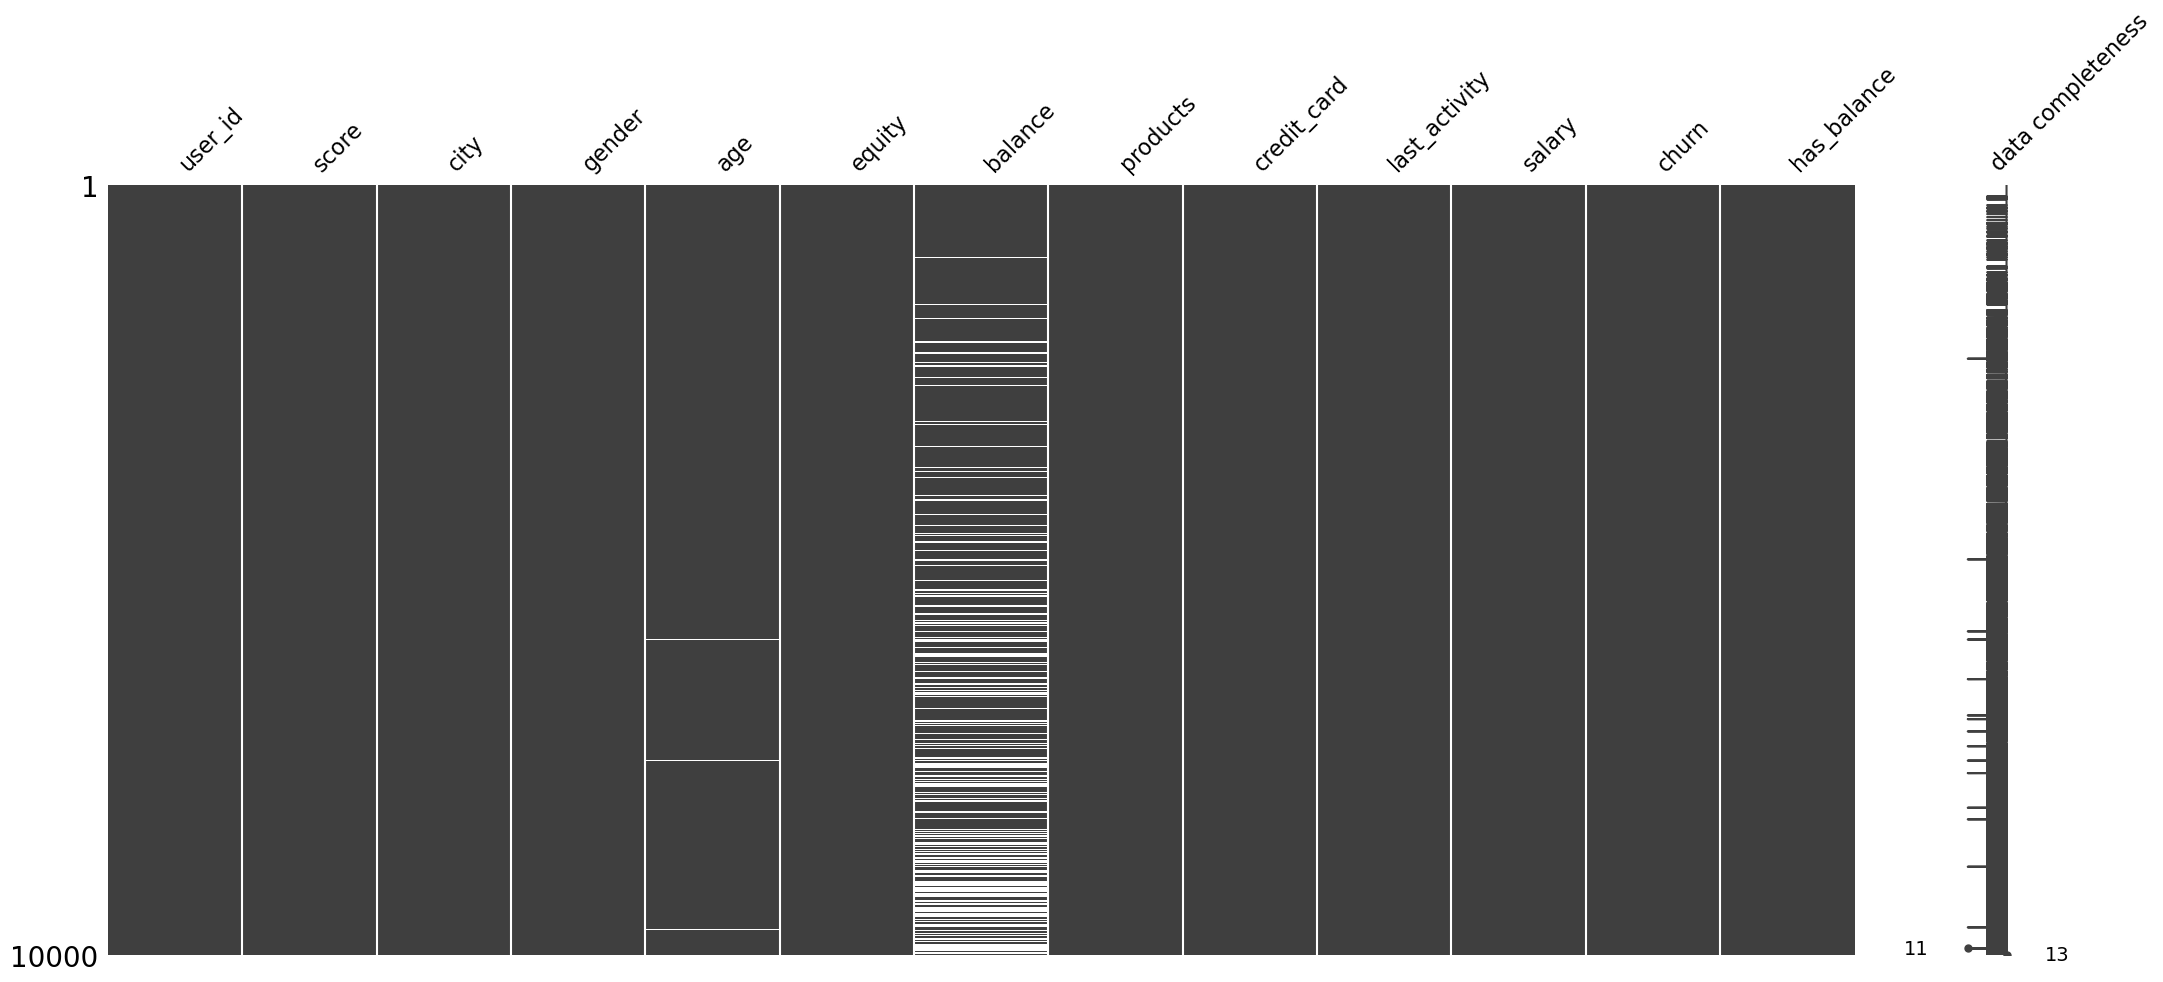

In [18]:
# распределение пропусков с сортировкой по доходу
msno.matrix(data.sort_values('salary', ascending=True), labels=True)
None

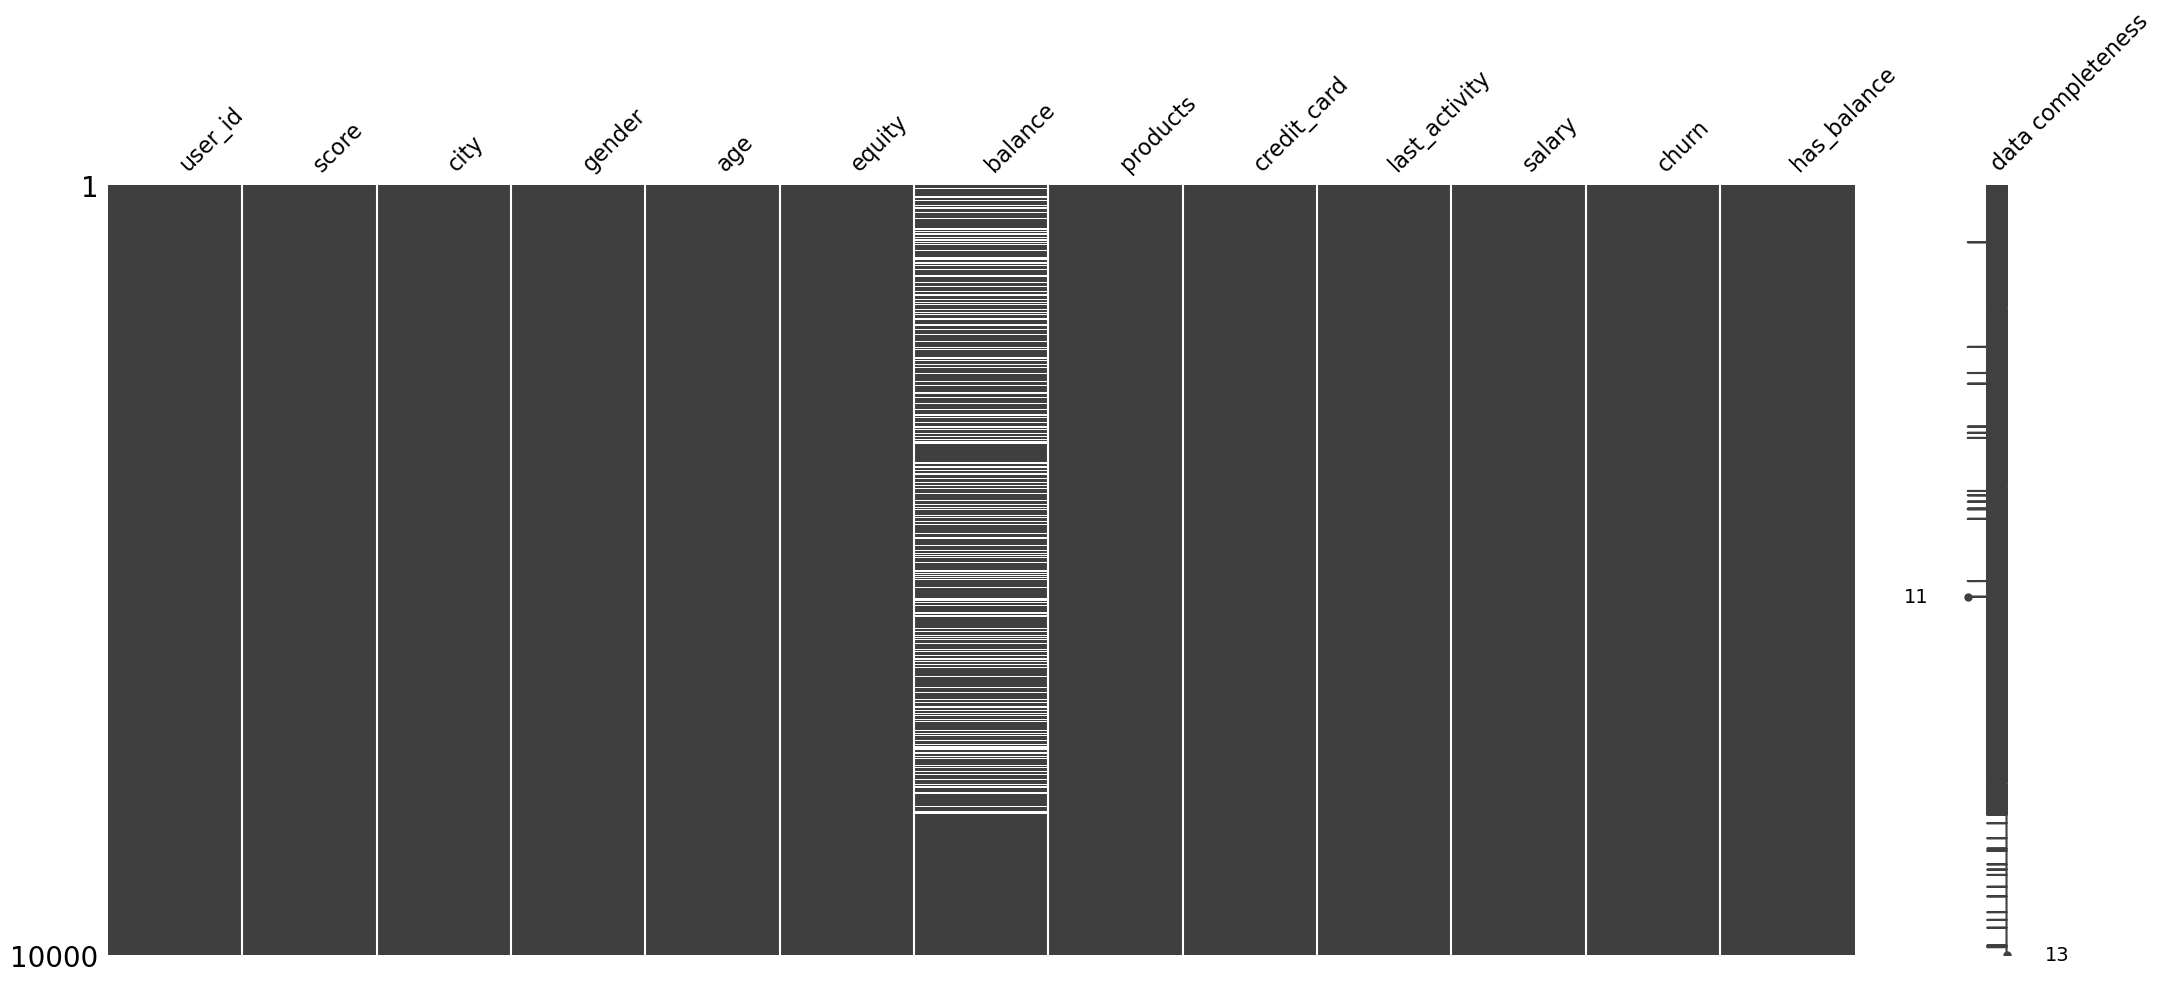

In [19]:
# распределение пропусков с сортировкой по признаку отточности
msno.matrix(data.sort_values('churn', ascending=True), labels=True)
None

Наиболее плотная концентрация пропусков в столбце `balance` наблюдается при сортировке по столбцу `equity` - с этим же столбцом было связано и самое большое значение коэффициента корреляции. Зависимость следующая: чем меньше у клиента баллов собственности, тем больше вероятность, что данных о его балансе в таблице нет. Возможно, отсутствие таких данных каким-то образом связано с набором услуг, которыми пользуются такие клиенты.

Отметим также, что частота появления пропусков в столбце `balance` возрастает по мере роста дохода клиентов и снижается по мере увеличения количества банковских продуктов, которыми пользуется клиент. При сортировке по признаку отточности пропуски распределены по большей части равномерно - вероятно, другие признаки оказывают на отсутствие или наличие баланса большее влияние.

Выделим данные с пропусками в столбце `balance` и изучим распределение данных в этом срезе.


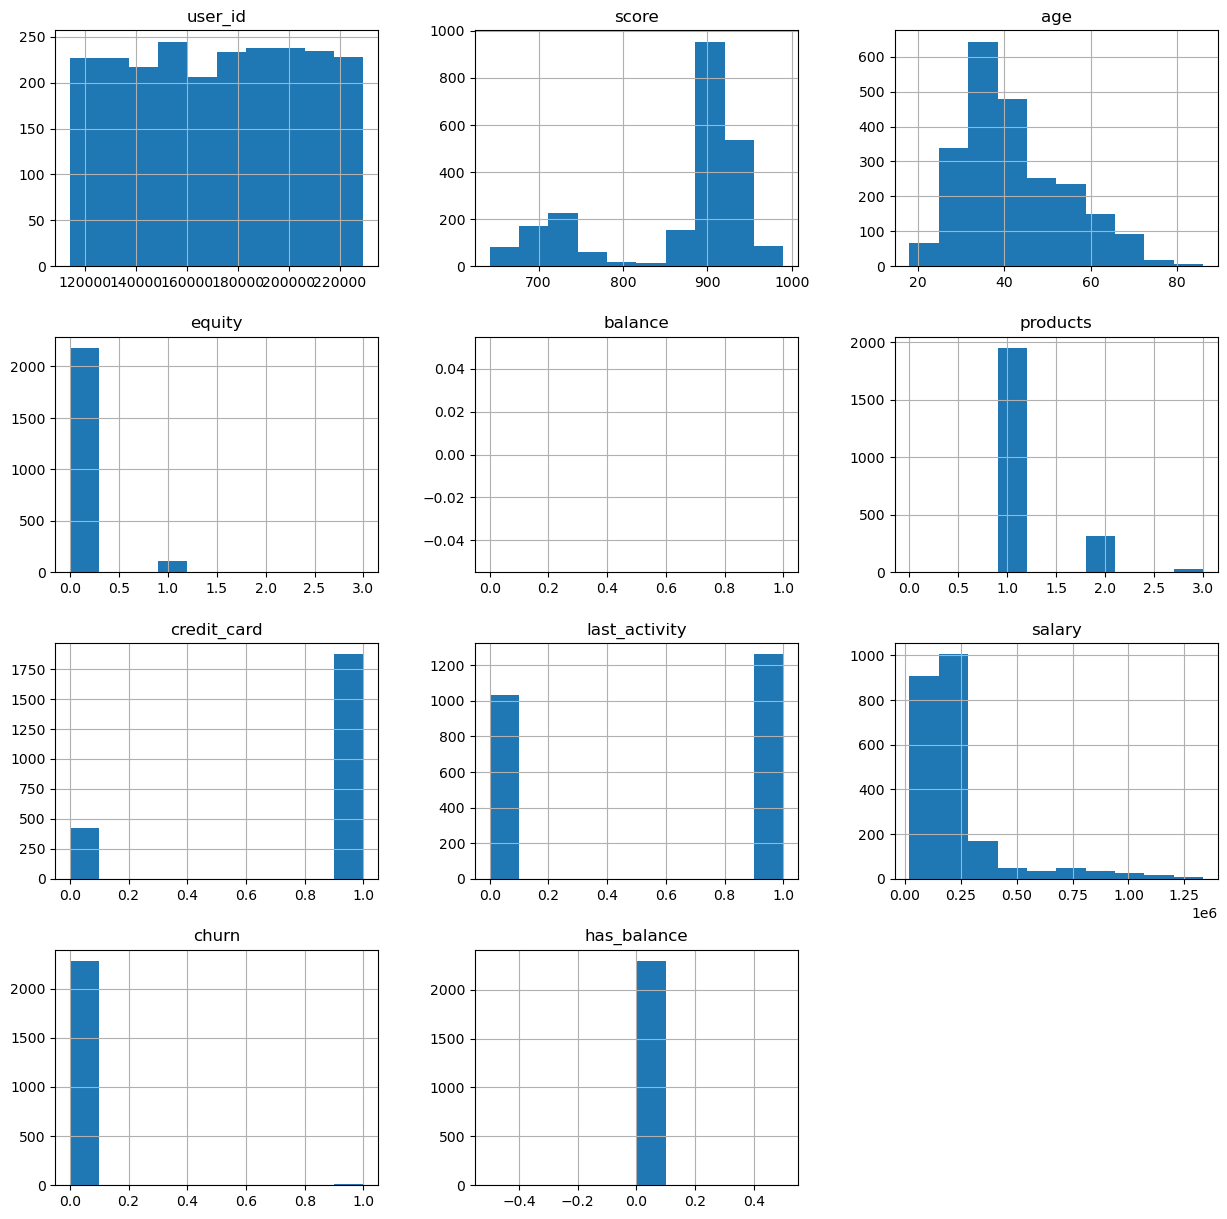

In [20]:
data.query('has_balance == 0').hist(figsize=(15, 15))
None

Типичный клиент с пропуском в столбце `balance`:
- имеет достаточно много баллов кредитного скоринга (в районе 900)
- не старше 40 лет
- не имеет собственности
- пользуется одним банковским продуктом (этим продуктом является кредитная карта)
- проявлял активность в последнее время
- получает не больше 260 тыс.руб.
- не планирует отказываться от услуг банка

Исходя из полученных данных, можем предположить, что баланс счета не отображается у владельцев кредитных карт.

Таким образом, пропуски в столбце `balance` мы можем отнести к категории MNAR (Missing Not At Random / Отсутствует не случайно). Удалить строки с пропусками в этом столбце мы не можем, так как их слишком много (22,95% данных). Заполнение каким-либо числовым значением может привести к смещению мер центральной тенденции (среднего и медианного значения). Оставим пропуски в столбце без заполнения, при необходимости в дальнейшем анализе будет использовать созданный столбец `has_balance`.

Перейдем к пропускам в столбце `age`. Оценим наличие взаимосвязи между наличием или отсутствием пропусков в столбцах `age` и `balance` с помощью метода `heatmap` библиотеки `missingno`.

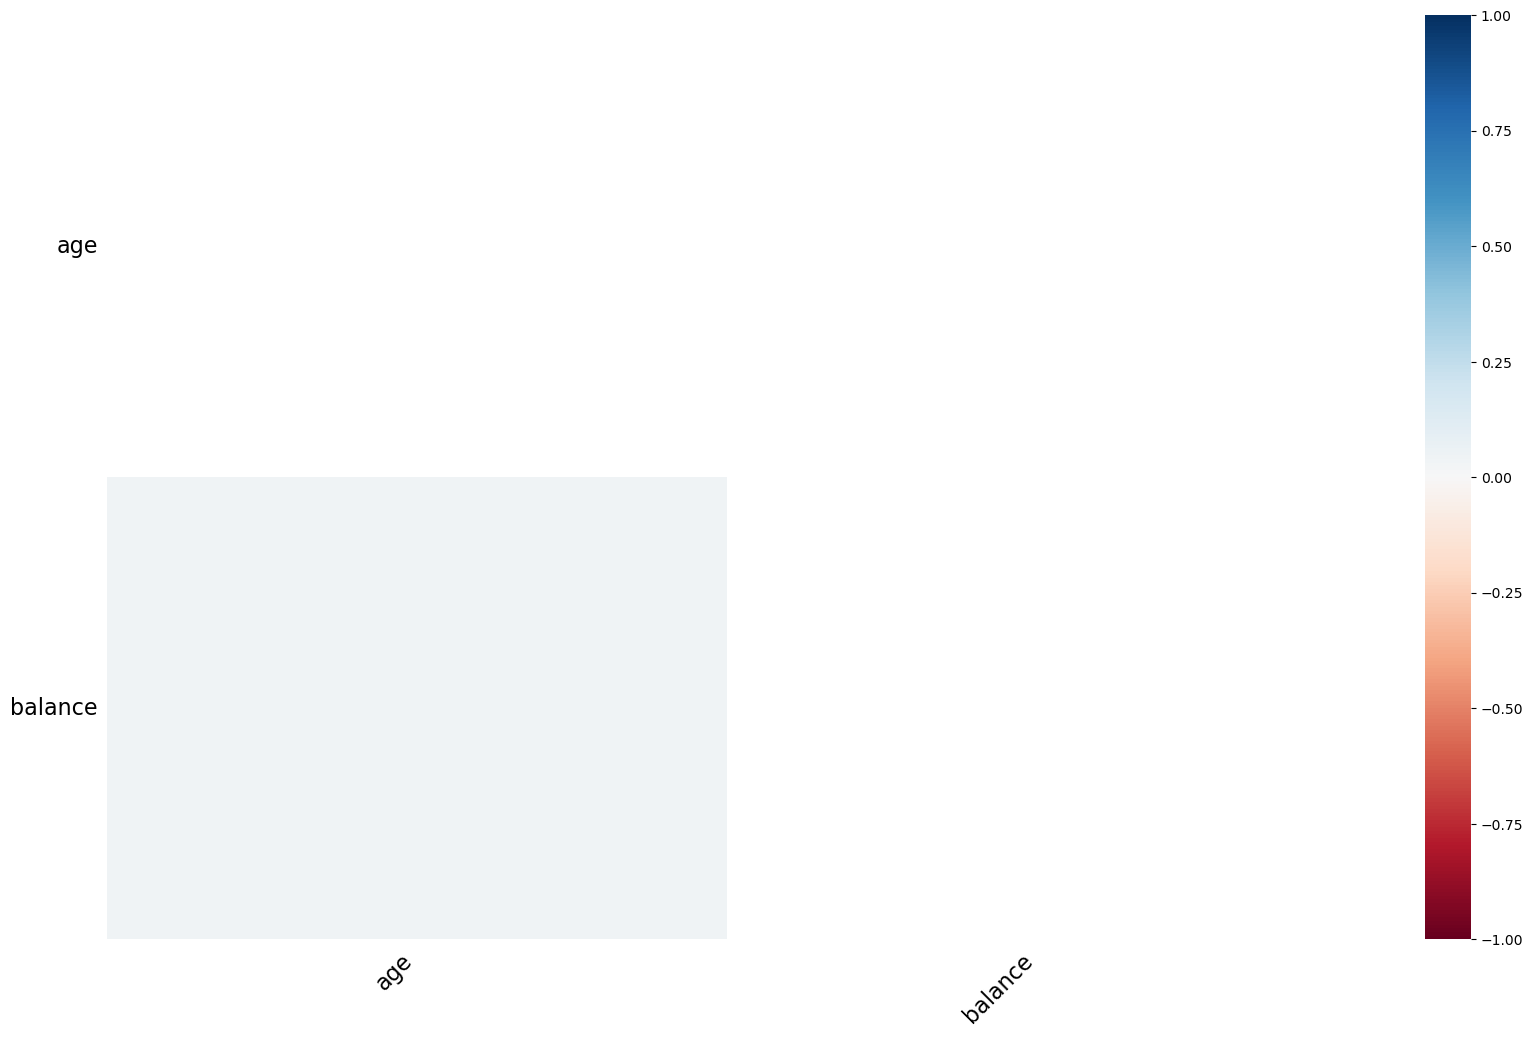

In [21]:
msno.heatmap(data)
None

Отсутствие или присутствие данных в одном столбце никоим образом не влияет на отсутствие или присутствие данных в другом.

Выведем тепловую карту с матрицей корреляции данного признака с остальными.

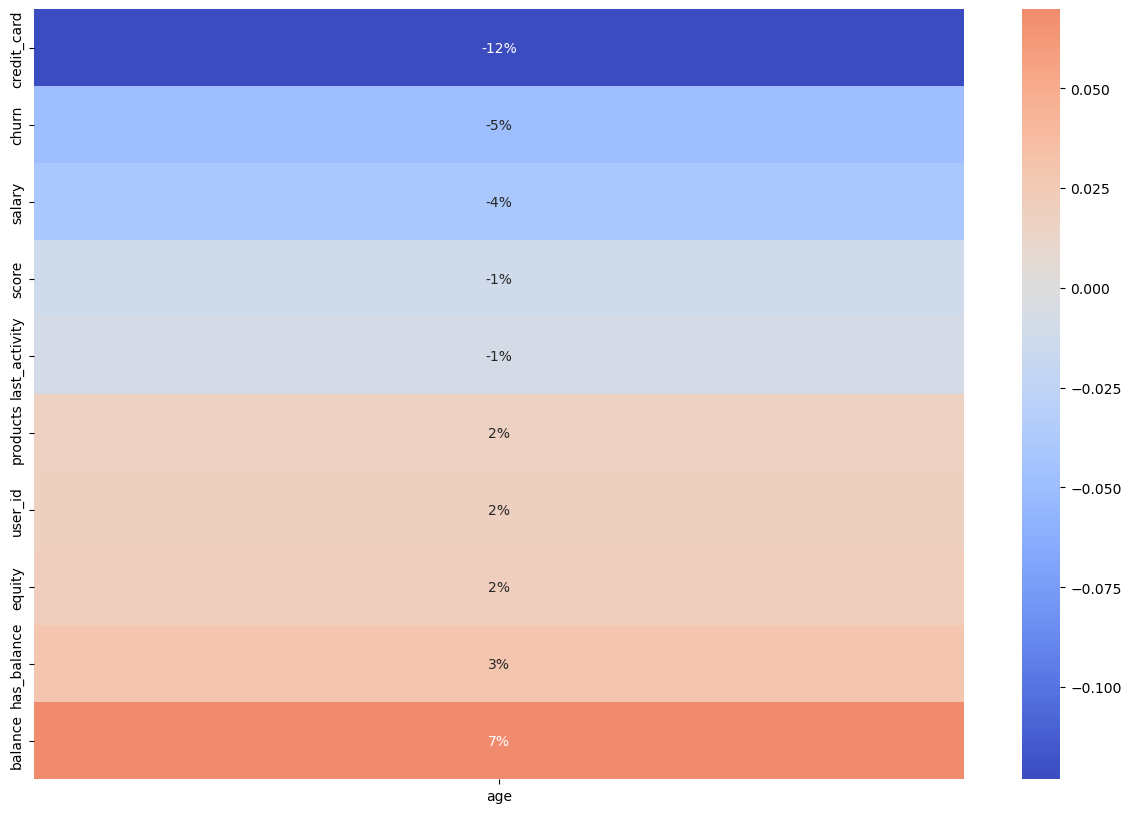

In [22]:
# выводим хитмэп
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr().loc[:,['age']].drop(['age']).sort_values('age'), annot=True, fmt='.0%', cmap='coolwarm', center=0)
plt.show()

За исключением слабой обратной корреляции с наличием кредитной карты другой значимой зависимости мы не наблюдаем.

Большинство пропусков в этом столбце (23 из 26) были обнаружены в строках с повторяющимися клиентскими id. Более подробный анализ дубликатов будет проводиться позднее, но уже сейчас мы можем предположить, что пропуски данных в столбце `age` могут быть связаны с появлением дублей в таблице. Так как получение банковских услуг без предъявления паспорта в настоящее время не представляется возможным, вероятнее всего, отсутствие данных в возрасте не связано, например, с желанием или нежеланием клиента его озвучить. Предполагаем, что при заполнении или выгрузке данных мог произойти технический сбой, который привел с потере части данных (и, возможно, появлению дубликатов).

Таким образом, пропуски в столбце `age` не связаны с другими данными, и мы можем отнести их к категории MAR (Missing At Random / Отсутствует случайно). Учитывая отсутствие связи с другими данными и малый объем пропусков (0,26%) данных, полагаем, что удаление строк с пропусками в столбце `age` является обоснованным решением.

In [23]:
# удалаем строки с пропусками
data.dropna(axis = 'index', subset = ['age'], inplace = True)

### Анализ и обработка дубликатов

Так как на предыдущем шаге мы удалили часть строк, количество дубликатов изменилось. Пересчитаем их и выведем на экран.

In [24]:
duplicates = []
for i in data['user_id'].value_counts().index:
    if data['user_id'].value_counts()[i] > 1:
        duplicates.append(i)


print('Неявных дубликатов в таблице:', len(duplicates))

Неявных дубликатов в таблице: 50


In [25]:
pd.set_option('display.max_rows', None)
data.query('user_id in @duplicates').sort_values(by='user_id')

user_id  score       city gender   age  equity      balance  products  \
1893   116540  883.0    Рыбинск      Ж  55.0       1    362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0          NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6   1036832.93         4   
7542   117943  880.0  Ярославль      Ж  40.0       0          NaN         1   
5863   120258  908.0    Рыбинск      Ж  38.0       4   2213581.63         2   
5896   120258  905.0  Ярославль      М  30.0       0          NaN         1   
1411   123461  829.0  Ярославль      Ж  59.0       0     96222.44         2   
8638   123461  934.0    Рыбинск      М  34.0       0          NaN         2   
9775   124450  758.0    Рыбинск      Ж  36.0       0     73574.07         2   
8164   124450  859.0  Ярославль      Ж  38.0       6    516811.20         1   
4850   126368  909.0  Ярославль      Ж  30.0       4   1322623.29         2   
5420   126368  832.0    Рыбинск      Ж  33.0       0          NaN         1   
3988   129785  904.0    Рыбинск      М  33.0       5   2427737.60         3   
9504   129785  949.0  Ярославль      М  43.0       0          NaN         1   
2138   131419  739.0    Рыбинск      Ж  37.0       3   1307941.65         3   
904    131419  934.0  Ярославль      М  35.0       5   2348335.95         2   
1608   140377  802.0  Ярославль      М  26.0       3    539863.29         4   
7487   140377  930.0    Рыбинск      Ж  34.0       5   1123967.02         1   
2276   141265  858.0  Ярославль      М  37.0       4    471599.16         2   
5569   141265  811.0    Рыбинск      Ж  33.0       3   1044316.88         2   
5369   143592  885.0    Рыбинск      Ж  56.0       4   1201087.46         2   
5557   143592  764.0  Ярославль      Ж  68.0       3    508919.15         2   
8364   148826  909.0    Рыбинск      Ж  32.0       0          NaN         3   
5252   148826  895.0  Ярославль      М  32.0       5   1470273.14         2   
946    149365  877.0  Ярославль      М  41.0       5    819182.01         2   
8272   149365  793.0    Рыбинск      Ж  61.0       0    476496.99         2   
2439   150667  813.0    Рыбинск      Ж  44.0       0     62504.47         4   
9267   150667  931.0  Ярославль      М  41.0       0          NaN         1   
690    152479  768.0    Рыбинск      Ж  42.0       0    126787.79         4   
5705   152479  723.0  Ярославль      Ж  22.0       0          NaN         1   
3274   155765  863.0  Ярославль      М  30.0       5   1036114.50         5   
5197   155765  923.0    Рыбинск      М  30.0       0          NaN         1   
1080   155872  896.0  Ярославль      М  36.0       3   1113656.92         3   
9363   155872  714.0    Рыбинск      Ж  29.0       0          NaN         1   
3936   160075  899.0  Ярославль      М  34.0       4   1647814.67         4   
9508   160075  824.0    Рыбинск      Ж  57.0       3    355047.33         2   
8733   162053  786.0  Ярославль      М  29.0       4    205824.97         3   
5629   162053  921.0    Рыбинск      М  33.0       3    857011.13         2   
6786   163207  838.0  Ярославль      Ж  42.0       4    652776.60         2   
3564   163207  853.0    Рыбинск      М  42.0       4    543839.62         1   
7271   164676  790.0    Рыбинск      Ж  77.0       1    111202.01         1   
58     164676  860.0  Ярославль      М  37.0       5    648594.03         2   
9785   168998  895.0    Рыбинск      М  44.0       0    282653.53         3   
5020   168998  886.0  Ярославль      Ж  35.0       4    394780.61         2   
790    170312  901.0  Ярославль      М  33.0       4   3276783.93         3   
3039   170312  813.0    Рыбинск      Ж  47.0       3    370027.67         2   
4587   171751  874.0    Рыбинск      Ж  26.0       5    292054.42         2   
9653   171751  862.0  Ярославль      М  42.0       4    481992.19         2   
6756   172142  751.0    Рыбинск      Ж  69.0       3    396568.03         2   
2941   172142  896.0  Ярославль      Ж  30.0       4   1

In [26]:
print(f"Количество уникальных сумм дохода: {data.query('user_id in @duplicates')['salary'].nunique()}")
print(f"Количество пропусков в столбце balance: {data.query('user_id in @duplicates')['balance'].isna().sum()}")
print(f"Количество уникальных сумм баланса: {data.query('user_id in @duplicates')['balance'].nunique()}")

Количество уникальных сумм дохода: 100
Количество пропусков в столбце balance: 19
Количество уникальных сумм баланса: 81


После удаления строк с пропусками количество неявных дубликатов уменьшилось. После изучения дублирующихся данных можем сделать следующие наблюдения:
1. Дублируются данные о клиентах из двух городов - Ярославля и Рыбинска, причем в дублированных парах один клиент всегда из Ярославля, второй - из Рыбинска.
2. Суммы дохода и баланса счета не совпадают ни в одной из строк.
3. Есть случаи совпадения пола и возраста (например, ID 155765, 227795), но в таких случаях есть различия в других данных.

Можем сделать два предположения:
1. Так как совпадений по суммам дохода и баланса нет, задублированные идентификаторы принадлежат разным клиентам. Особенность распределения таких клиентов по городам позволяет предположить, что произошел технический сбой, в результате которого клиентам из разных городов были присвоены одинаковые идентификаторы.
2. Часть дублей может относиться к одним и тем же клиентам (совпадений по полу и возрасту мало, но они есть). Можем предположить, что в таблицу попали исторические данные (например, клиент мог переехать и воспользоваться услугами банка в другом филиале; могла обнаружиться ошибка в заполнении данных, и клиент был перерегистрирован в системе с тем же самым id; клиент мог давно отказаться от услуг банка, его идентификатор был присвоен другому клиенту, а его данные не были удалены из базы данных). В таком случае без дополнительной информации мы не можем установить, данные по какому клиенту являются актуальными.

Достоверно установить тождество клиентов в дублирующихся строках мы в обоих случаях не можем, поэтому удаление строк с дублирующимися идентификаторами не кажется целесообразным - можно потерять часть полезных данных. Оставим эти строки, а в дальнейшем при подсчете количества клиентов будем использовать метод `count()`, а не `nunique()`.

### Обработка категориальных данных

В двух столбцах с категориальными данными (город и пол) информация представлена в текстовом виде. Такое представление данных не позволит провести анализ корреляции, поэтому такие переменные мы преобразуем в фиктивные. Так как с столбце `gender` всего два значения, создадим столбец `male`, в который передадим 1 для обозначения мужского пола и 0 для женского. Для преобразования столбца `city`иИспользуем метод `get_dummies()`. Данный метод удаляет исходные столбцы, а мы бы хотели их сохранить. Создадим временную таблицу data1 с фиктивными переменными, из которой затем извлечем нужные столбцы.

In [27]:
# создаем столбец male 
data['male'] = data['gender'].apply(lambda x: 1 if x == 'М' else 0)

# преобразуем столбец city
data1 = pd.get_dummies(data, columns=['city'])

# добавляем в таблицу data столбцы с признаками проживания в городах
data[['Ростов', 'Рыбинск', 'Ярославль']] = data1[['city_Ростов', 'city_Рыбинск', 'city_Ярославль']]

### Преобразование типов данных

Данные в столбцах `score` и `age` логично представить в виде целочисленных данных, так как их в таком случае будет легче воспринимать.

In [28]:
data['age'] = data['age'].astype('int')
data['score'] = data['score'].astype('int')

### Поиск аномалий и выбросов

Построим гистограммы распределения данных в таблице для определения наличия выбросов.

In [29]:
data['salary'].describe()

count    9.974000e+03
mean     1.477868e+05
std      1.392855e+05
min      2.546300e+03
25%      7.525166e+04
50%      1.196268e+05
75%      1.744998e+05
max      1.395064e+06
Name: salary, dtype: float64

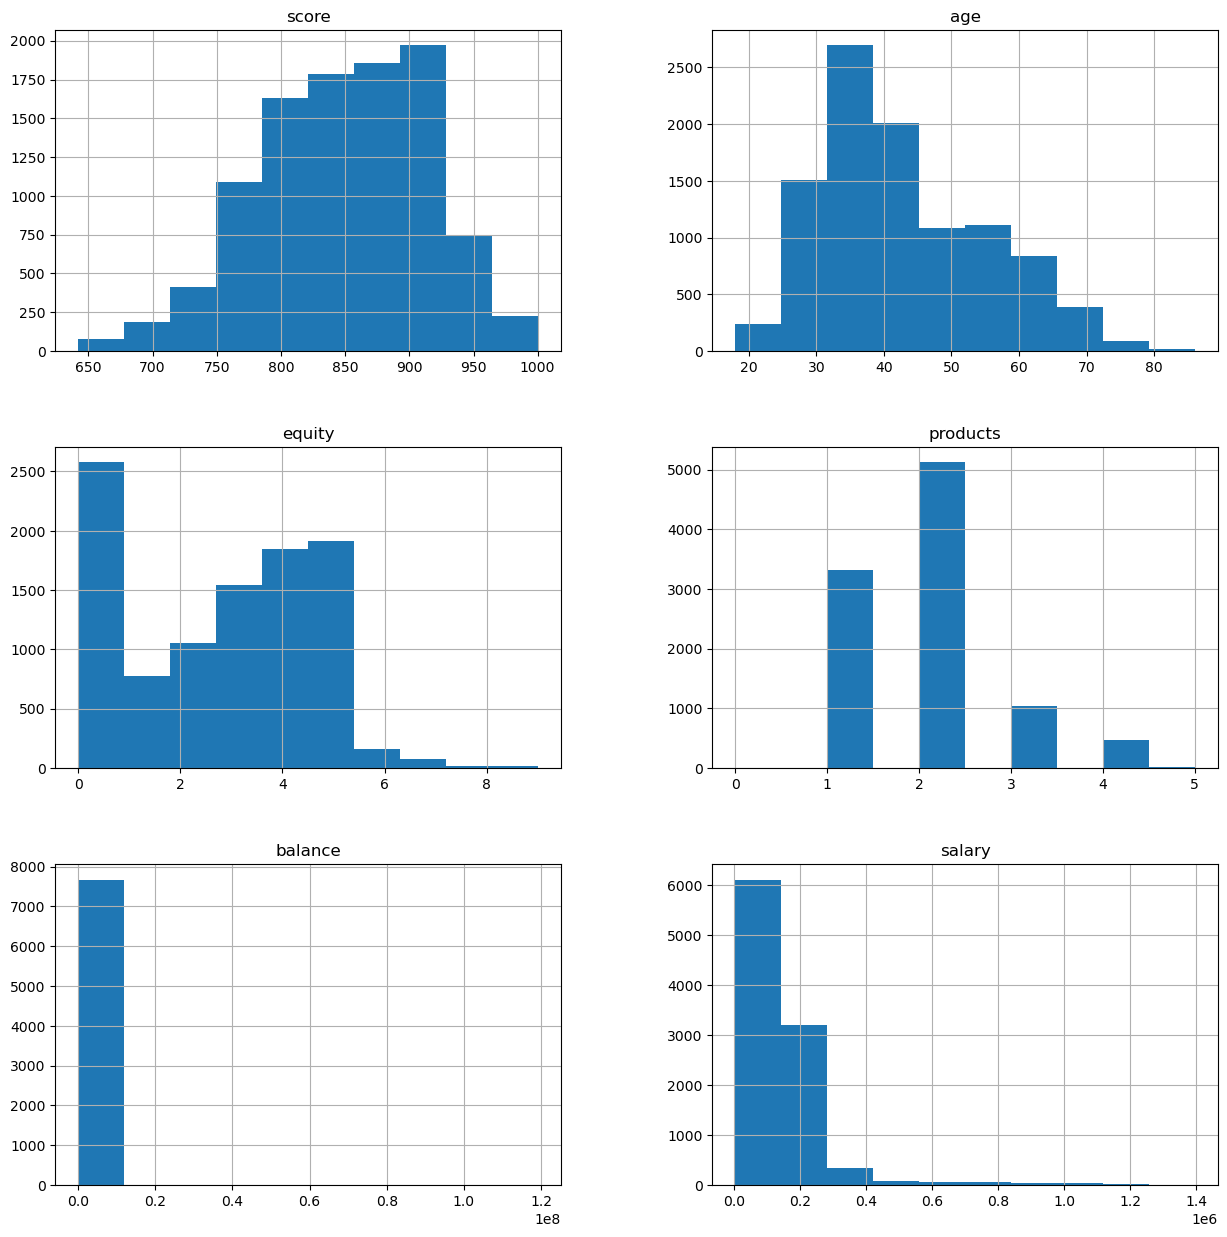

In [30]:
data[['score', 'age', 'equity', 'products', 'balance', 'salary']].hist(figsize=(15, 15))
None

Обратим внимание на два столбца с явными выбросами: `balance` и `salary`. Также в таблице есть строки со значением 0 в столбце `products` - рассмотрим и его тоже.

In [31]:
# строим диаграмму размаха по столбцу balance

fig = px.box(data, y='balance', width=500, height=800,labels={'balance':'Баланс на счёте'}, title='Диаграмма размаха баланса на счёте')
fig.show()

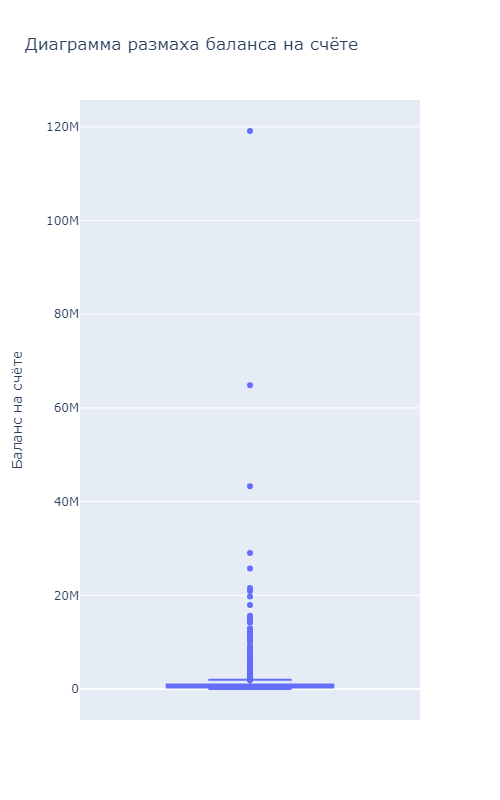

In [32]:
# строим диаграмму размаха по столбцу salary

fig = px.box(data, y='salary', width=500, height=800, labels={'salary':'Доход'}, title='Диаграмма размаха дохода клиентов')
fig.show()

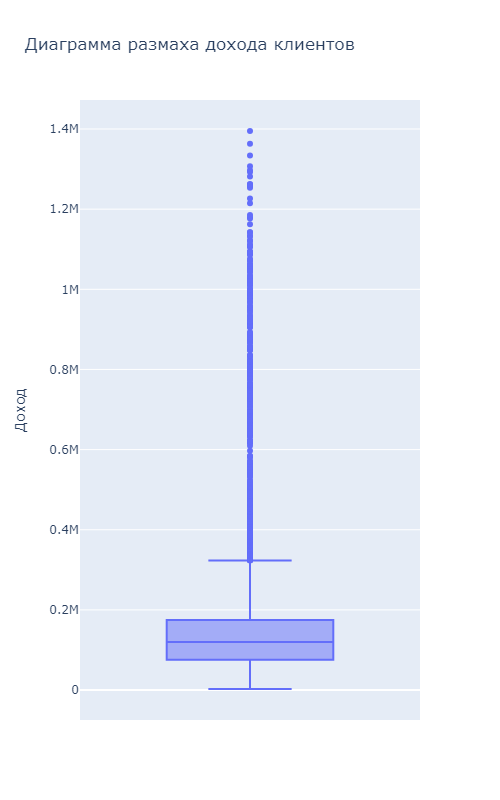

Выбросы в обоих столбцах довольно многочисленны и значительны:
- максимальное значение баланса более 119 млн.руб. при медианном значении 524 тыс.руб.
- максимальное значение дохода почти 1,4 млн.руб. при медианном значении 119 тыс.руб.

Судя по всему, клиентура банка - в основном люди достаточно обеспеченные (вероятно, среди них много предпринимателей). Максимальные суммы весьма велики, но не кажутся неправдоподобными, поэтому отсекать их как аномалии мы не будем. Однако они могут исказить графики распределения, поэтому в дальнейшем построение графиков по столбцам `balance` и `salary` будем проводить по срезам по 99 перцентилю.

Рассчитаем эти значения.

In [33]:
print(f"Значение 99 перцентиля для столбца salary: {round(np.percentile(data['salary'], 99))} руб.")
print(f"Значение 99 перцентиля для столбца balance: {round(np.nanpercentile(data['balance'], 99))} руб.")

Значение 99 перцентиля для столбца salary: 886323 руб.
Значение 99 перцентиля для столбца balance: 4827211 руб.


Изучим распределение данных в столбце `products`.

In [34]:
fig = px.bar(data.groupby('products').agg({'user_id':'count'}).reset_index(), x='products', y='user_id', text='user_id', labels={'user_id':'Количество клиентов', 'products':'Количество банковских продуктов'}, title='Распределение количества банковских продуктов')
fig.show()

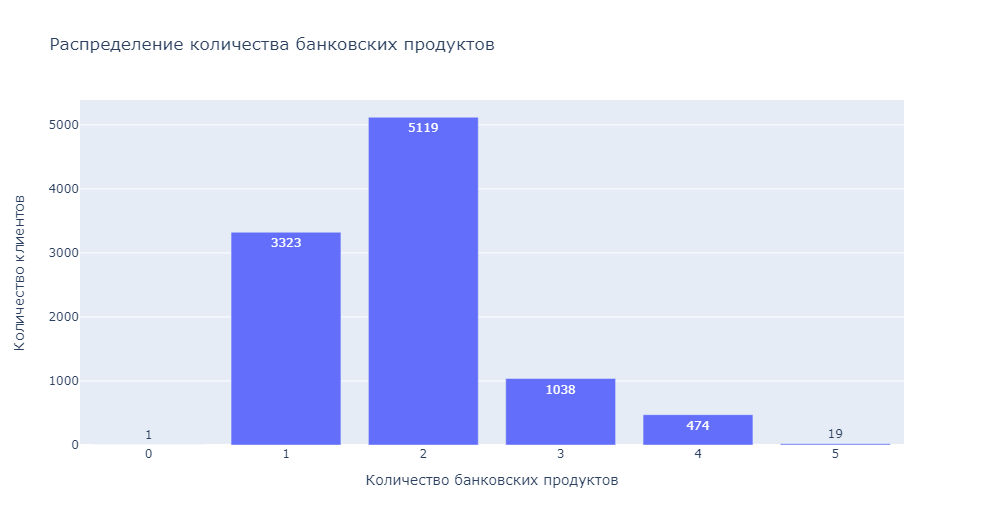

Быть клиентом банка и не пользоваться ни одним его продуктом довольно затруднительно, поэтому можем предположить, что один такой обнаруженный клиент по факту клиентом уже не является. Удалим эту строку.

In [35]:
data = data.query('products > 0')

### Результат предобработки данных

Рассмотрим обработанную таблицу.

In [36]:
data.head(10)

user_id  score       city gender  age  equity     balance  products  \
0   183012    850    Рыбинск      Ж   25       1    59214.82         2   
1   146556    861    Рыбинск      Ж   37       5   850594.33         3   
2   120722    892    Рыбинск      Ж   30       0         NaN         1   
3   225363    866  Ярославль      Ж   51       5  1524746.26         2   
4   157978    730  Ярославль      М   34       5      174.00         1   
5   202305    856    Рыбинск      М   56       4   863687.24         3   
6   177259    807  Ярославль      Ж   39       3   405042.44         3   
7   218868    825  Ярославль      Ж   38       4   458145.40         2   
8   211686    923  Ярославль      М   54       5  1206337.87         2   
9   133130    906  Ярославль      Ж   67       0         NaN         1   

   credit_card  last_activity     salary  churn  has_balance  male  Ростов  \
0            0              1   75719.14      1            1     0       0   
1            1              0   86621.77      0            1     0       0   
2            1              1  107683.34      0            0     0       0   
3            0              1  174423.53      1            1     0       0   
4            1              0   67353.16      1            1     1       0   
5            1              0  156619.80      0            1     1       0   
6            0              1  103838.32      0            1     0       0   
7            1              1   68085.48      0            1     0       0   
8            1              0  155371.79      0            1     1       0   
9            0              1  238055.53      0            0     0       0   

   Рыбинск  Ярославль  
0        1          0  
1        1          0  
2        1          0  
3        0          1  
4        0          1  
5        1          0  
6        0          1  
7        0          1  
8        0          1  
9        0          1

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int32  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int32  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  salary         9973 non-null   float64
 11  churn          9973 non-null   int64  
 12  has_balance    9973 non-null   int64  
 13  male           9973 non-null   int64  
 14  Ростов         9973 non-null   uint8  
 15  Рыбинск        9973 non-null   uint8  
 16  Ярославль      9973 non-null   uint8  
dtypes: float64(2), int32(2), int64(8), object(2), uint8(

После предобработки в таблице осталось 9973 строки (99,73% изначальных данных). Выполнено следующее:
1. Столбцы `user_id` и `salary` переименованы.
2. Удалены строки с пропусками в столбце `age`.
3. Пропуски в столбце `balance` оставлены без обработки.
4. Неявные дубликаты оставлены без обработки.
5. Созданы столбцы `has_balance`, `male`, `female`, `Ростов`, `Рыбинск`, `Ярославль` с признаками наличия баланса счёта, признаками пола и города проживания.
6. Удалена одна строка с 0 в столбце `products`.

Таблица подготовлена к дальнейшему анализу.

## Исследовательский анализ

Основная задача исследовательского анализа: выявление признаков и интервалов признаков, наиболее сильно коррелирующих с оттоком клиентов. Исходя из этой задачи составим план анализа:
1. Подсчет референсного значения (доли отточных клиентов по всей таблице).
2. Составление портретов типичных клиентов (отдельно клиентов в целом и отточных клиентов).
3. Подсчет доли отточных клиентов от общего количества в разрезе различных признаков.
4. Выявление взаимосвязи между признаками (корреляционный анализ).

### Подсчет доли отточных клиентов по всей таблице

In [38]:
print(f"Доля отточных клиентов по всей таблице: {round(100*data['churn'].mean(), 2)}%.")

Доля отточных клиентов по всей таблице: 18.23%.


По условию задачи, доля отточных клиентов в выделенных сегментах должна как минимум в два раза превышать долю отточных клиентов по всей таблице. Таким образом, доля оттока в сегменте должна быть не ниже 37%.

### Составление портретов типичных клиентов

Составим таблицу с мерами центральной тенденции по различным признакам для всех клиентов и отточных клиентов.

In [39]:
# считаем центральные меры для отточных клиентов
leaving = data.groupby('churn').agg(count=('user_id','count'),
                          age=('age','mean'),
                          avg_balance=('balance','mean'),
                          median_balance=('balance','median'),
                          avg_salary=('salary','mean'),
                          median_salary=('salary','median'),
                          score=('score','mean'),
                          products=('products','median'),
                          equity=('equity','median'),
                          city=('city', pd.Series.mode),
                          gender=('gender', pd.Series.mode),
                          credit_card=('credit_card', pd.Series.mode),
                          activity=('last_activity', pd.Series.mode)).reset_index().query('churn == 1').drop(columns='churn')

# меняем индекс для удобства
leaving.index = ['отточные']

# создаем временный столбец all для подсчета мер по всей таблице
data['all'] = 'all'

# считаем центральные меры для всех клиентов
all = data.groupby('all').agg(count=('user_id','count'),
                          age=('age','mean'),
                          avg_balance=('balance','mean'),
                          median_balance=('balance','median'),
                          avg_salary=('salary','mean'),
                          median_salary=('salary','median'),
                          score=('score','mean'),
                          products=('products','median'),
                          equity=('equity','median'),
                          city=('city', pd.Series.mode),
                          gender=('gender', pd.Series.mode),
                          credit_card=('credit_card', pd.Series.mode),
                          activity=('last_activity', pd.Series.mode)).reset_index().drop(columns='all')

# меняем индекс для удобства
all.index = ['все']

# объединяем таблицы
portrait = pd.concat([leaving, all])

portrait.T

отточные            все
count                     1818           9973
age                  41.429593      42.730773
avg_balance     1134458.209291  827245.587515
median_balance        783908.9      524295.33
avg_salary       148357.483157  147799.115241
median_salary        125408.88      119643.06
score               863.361936     848.671212
products                   2.0            2.0
equity                     4.0            3.0
city                 Ярославль      Ярославль
gender                       М              М
credit_card                  1              1
activity                     1              1

Для средних значений посчитаем абсолютную и относительную разницу между всей таблицей и отточными клиентами.

In [42]:
means = portrait.T.loc[['count', 'age', 'avg_balance', 'avg_salary', 'score']]
means['разница_абс'] = means['все'] - means['отточные']
means['разница_отн_%'] = 100*((means['отточные'] - means['все'])/means['все'])
means

отточные            все    разница_абс разница_отн_%
count                  1818           9973           8155    -81.770781
age               41.429593      42.730773        1.30118     -3.045066
avg_balance  1134458.209291  827245.587515 -307212.621776      37.13681
avg_salary    148357.483157  147799.115241    -558.367916      0.377788
score            863.361936     848.671212     -14.690724      1.731027

Средний баланс у отточных клиентов на 37% выше, чем у всех клиентов. Разница между средними заработными платами не превышает 1% от средней заработной платы по всей таблице. Кредитный скоринг у отточных клиентов выше на 1,7%.

Визуализируем данные.

In [43]:
fig = make_subplots(rows=4, cols=2)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['count'],
           text=portrait['count'],
           name='Количество клиентов'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['age'],
           text=round(portrait['age']),
           name='Средний возраст, лет'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['avg_balance'],
           text=round(portrait['avg_balance']),
           name='Средний баланс счёта, руб.'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['median_balance'],
           text=round(portrait['median_balance']),
           name='Медианный баланс счёта, руб.'),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['avg_salary'],
           text=round(portrait['avg_salary']),
           name='Средний доход, руб.'),
    row=3, col=1
)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['median_salary'],
           text=round(portrait['median_salary']),
           name='Медианный доход, руб.'),
    row=3, col=2
)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['score'],
           text=round(portrait['score']),
           name='Средний кредитный скоринг'),
    row=4, col=1
)

fig.add_trace(
    go.Bar(x=portrait.index,
           y=portrait['equity'],
           text=portrait['equity'],
           name='Медианный балл собственности'),
    row=4, col=2
)

fig.update_layout(height=800, width=1000, title_text='Портреты типичных клиентов')
fig.show()

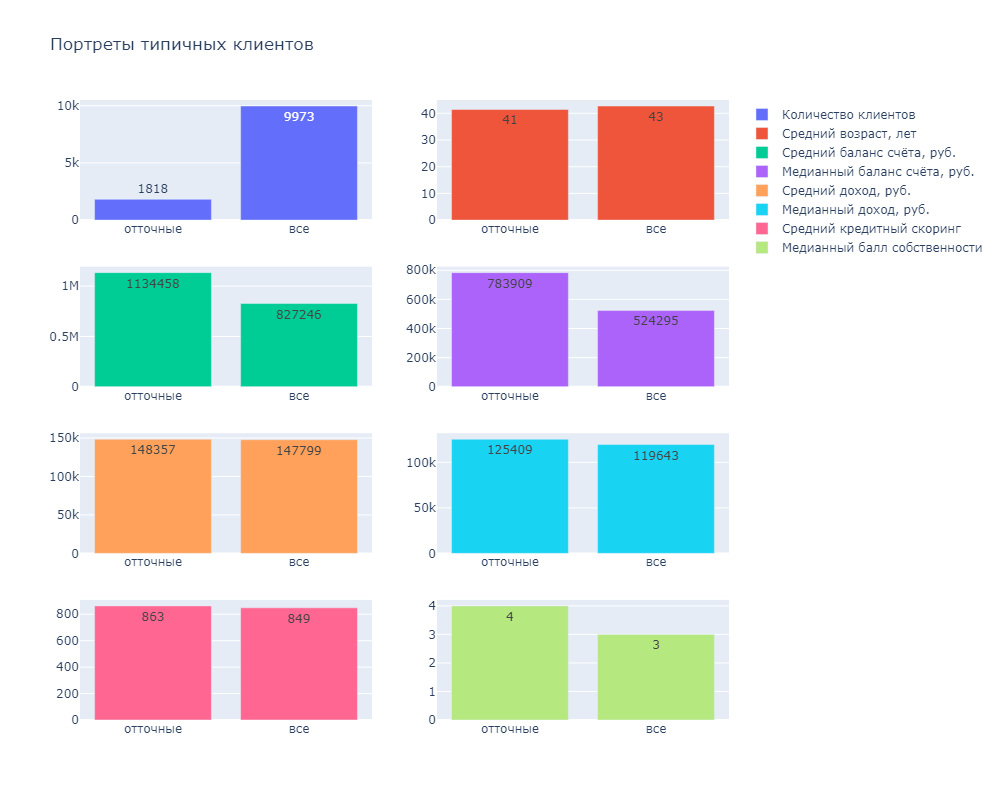

Таким образом, мы можем сравнить портреты типичных клиентов:
- в среднем отточный клиент зарабатывает чуть больше, чем обычный
- денег на балансе счета у отточного клиента больше, чем у обычного
- его кредитный скоринг чуть выше, чем у обычного
- собственности у отточного клиента больше, чем у обычного
- и тот, и другой клиент - мужчина средних лет (отточный чуть моложе) из Ярославля, обладатель кредитной карты, который проявлял активность в последние три месяца

Отметим так же, что медианные значения дохода и баланса счёта у обоих клиентов выше, чем средние значения, что еще раз демонстирует наличие выбросов в данных в большую сторону.

На первый взгляд кажется, что из банка более склонны уходить более обеспеченные клиенты. Однако только по портретам типичных клиентов однозначно такие выводы сделать нельзя. В следующем разделе мы подсчитаем доли отточных клиентов в разбивке по признакам.

### Подсчет и визуализация доли отточных клиентов по отдельным признакам

Методы визуализации распределения:
- для непрерывных признаков: гистограмма плотности распределения признака с разбивкой по отточности
- для категориальных признаков: столбчатая диаграмма с указанием доли отточных и неотточных клиентов по каждому признаку

Для удобства визуализации создадим столбцы с текстовыми обозначениями бинарных признаков.

In [44]:
data['churn_text'] = data['churn'].apply(lambda x: 'Уходят' if x == 1 else 'Остаются')
data['credit_card_text'] = data['credit_card'].apply(lambda x: 'есть' if x == 1 else 'нет')
data['last_activity_text'] = data['last_activity'].apply(lambda x: 'есть' if x == 1 else 'нет')

#### Распределение непрерывных признаков

In [45]:
# определяем функцию для выведения графиков
def hists(df, category, title, xlabel):
    fig = px.histogram(df, x=category,
                       color='churn_text',
                       histnorm='probability density',
                       barmode ='overlay', nbins=50,
                       labels={category:f'{xlabel}', 'churn_text':'Признак отточности'},
                       title=f'Распределение количества пользователей по {title} в разрезе признака отточности').update_layout(yaxis_title='Плотность распределения')
    fig.show()
    
# создаем списки с признаками, заголовками и подписями оси X    
categories = ['age', 'score', 'balance', 'salary']
titles = ['возрасту', 'кредитному скорингу', 'балансу счёта', 'доходу']
labels = ['Возраст', 'Кредитный скоринг', 'Баланс счёта', 'Доход']

for i in range(len(categories)):
    # для баланса и заработной платы передаем в функцию срезы по 99 перцентилю
    if categories[i] == 'balance' or categories[i] == 'salary':
        df = data[data[categories[i]] < np.nanpercentile(data[categories[i]], 95)]
    else:
        df = data
    hists(df, categories[i], titles[i], labels[i])

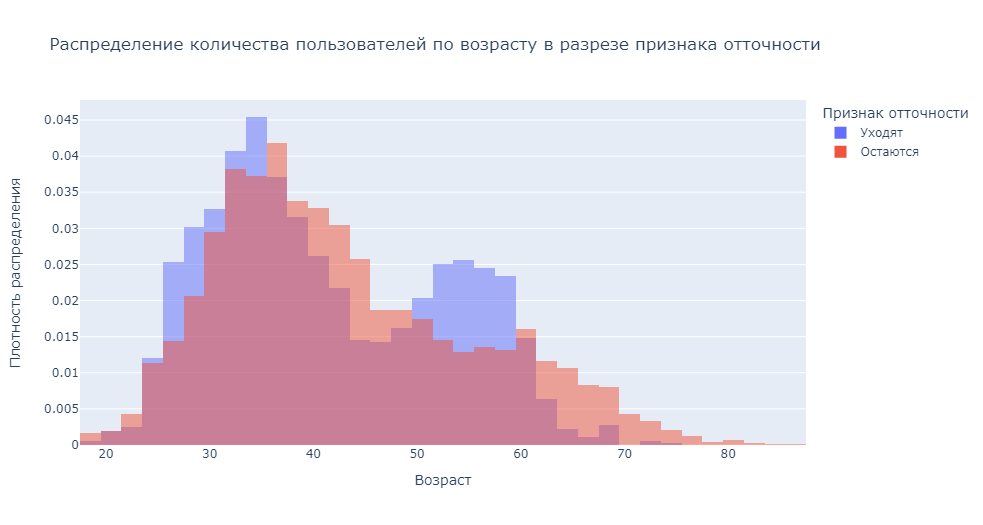

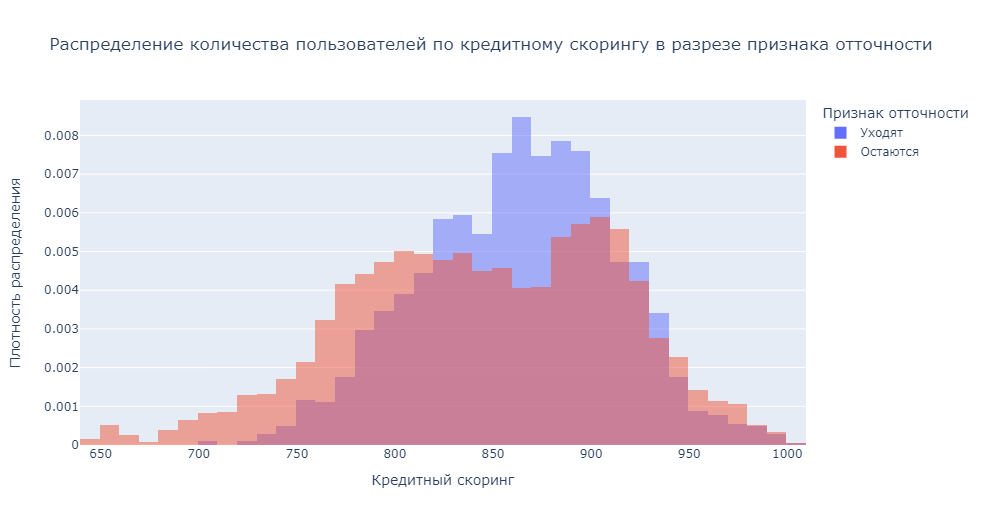

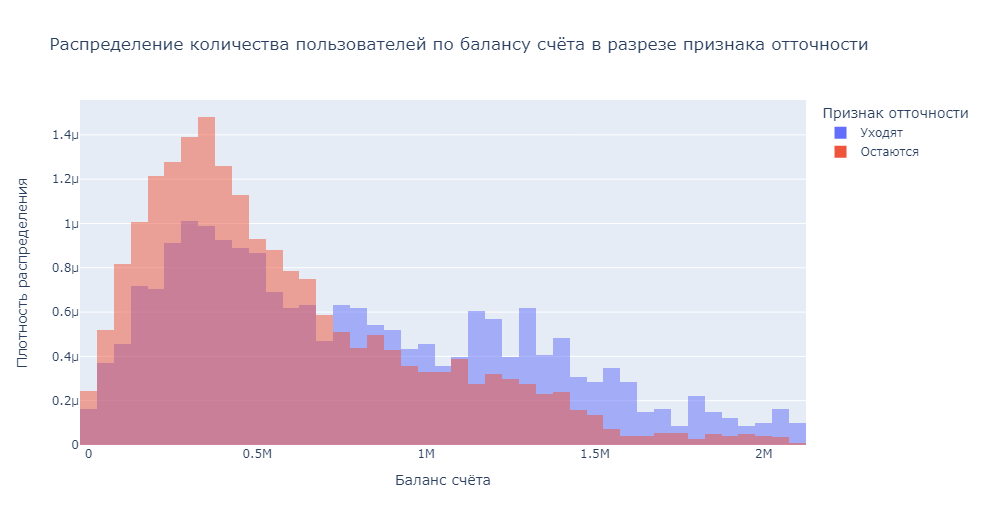

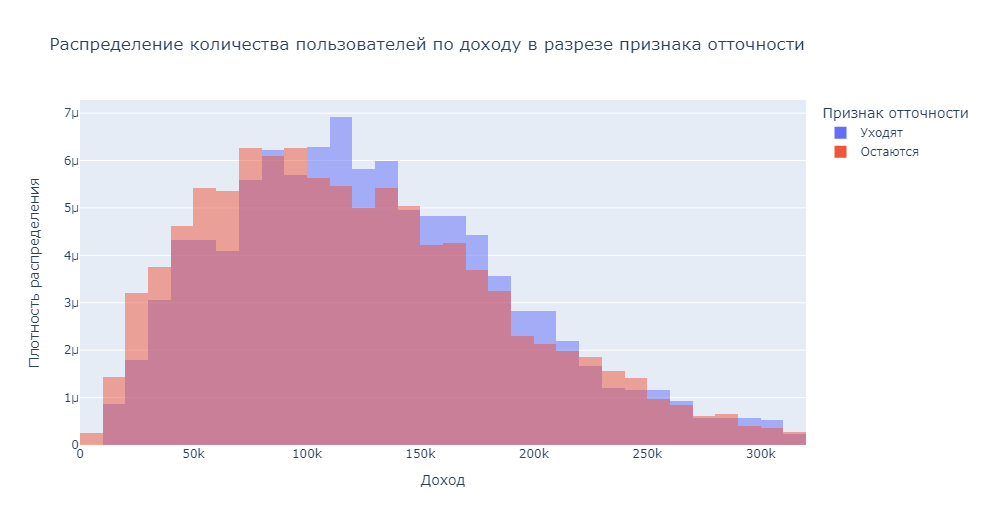

Гистограмма распределения возраста отображает, по всей видимости, реальную демографическую картину: выделяются два пика - молодые люди (32-37 лет) и люди в среднем и верхнем диапазоне среднего возраста (50-59 лет). Кредитный скоринг распределен более или менее нормально, а у графиков баланса и дохода даже после среза есть заметные хвосты справа.

#### Распределение категориальных признаков

Сгруппируем таблицу по категориальным признакам и изучим доли отточных клиентов в каждой категории. Дополнительно выведем количество клиентов в каждой категории - это поможет нам выявить высокотточные, но малочисленные категории.

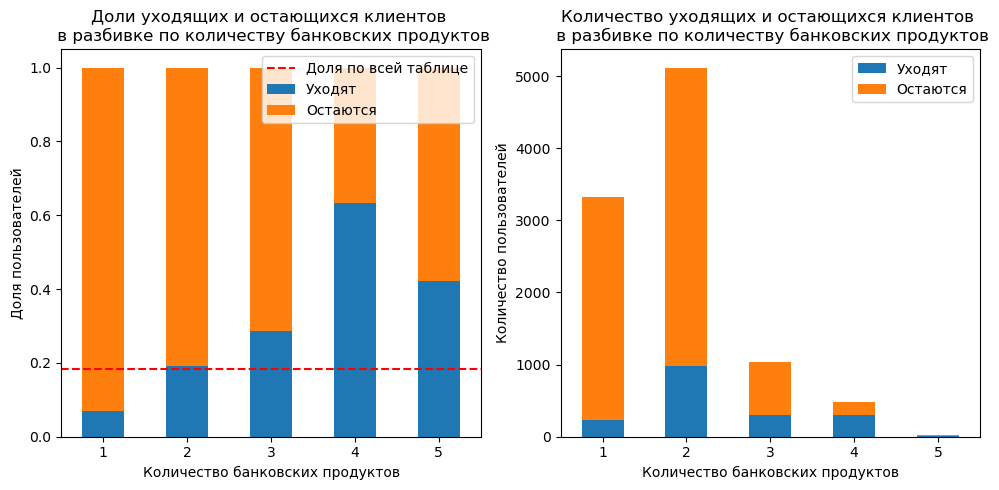

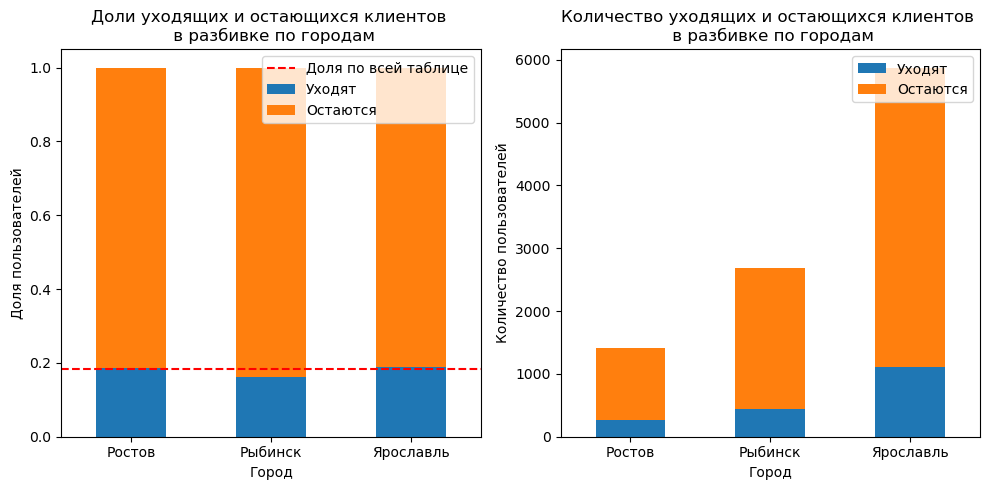

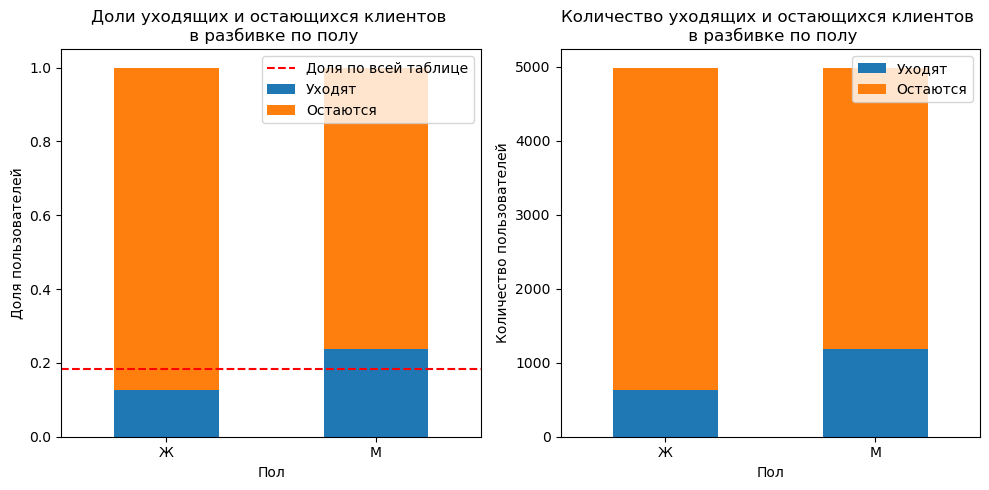

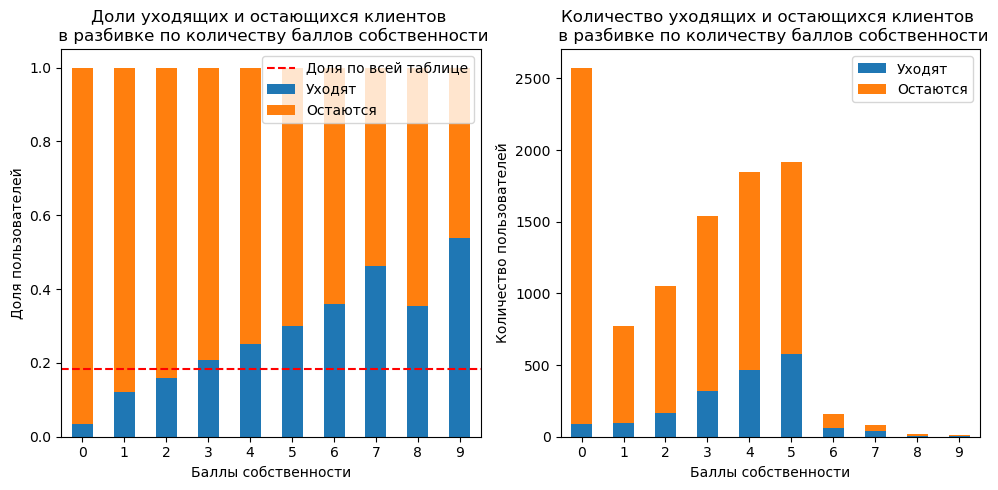

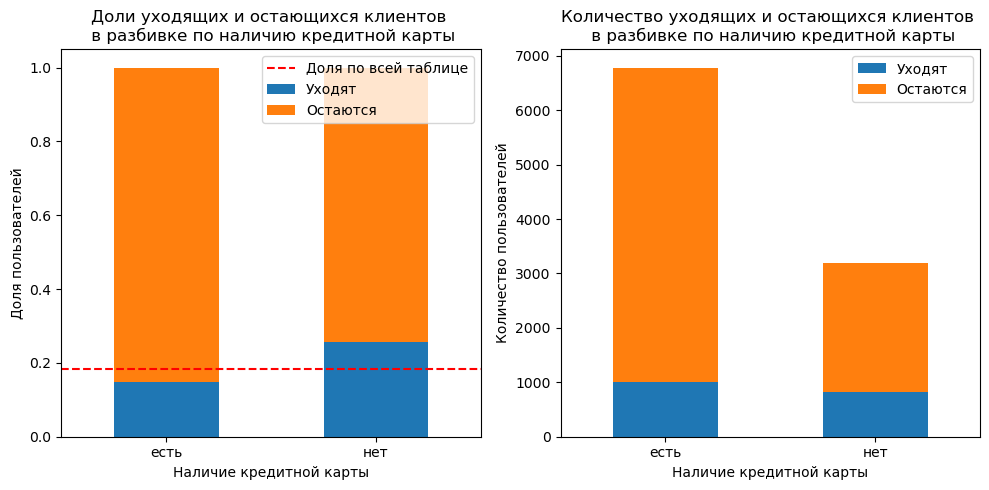

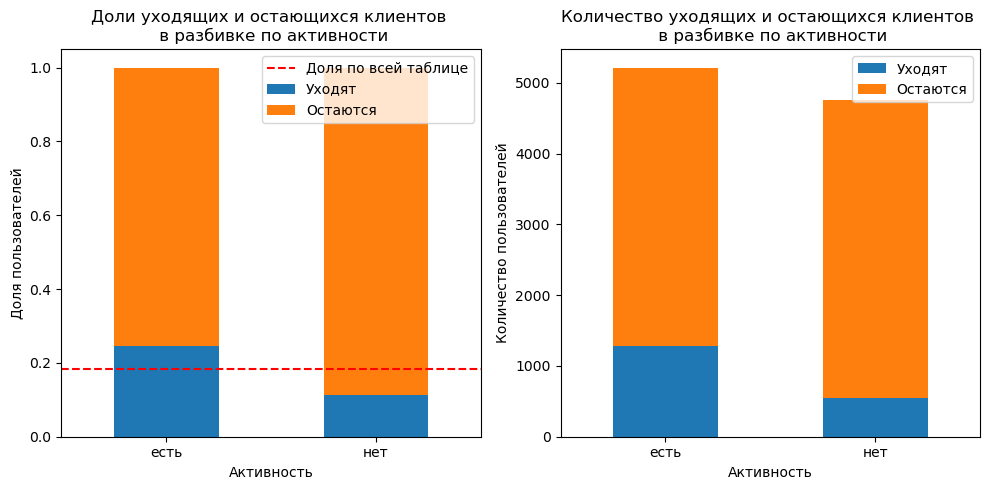

In [46]:
# определяем функцию для выведения графиков
def bars(category, title, xlabel):
    plt.figure(figsize=(10, 5))
    
    # график с долей отточных клиентов в категогии
    ax1 = plt.subplot(1, 2, 1)
    df = data.groupby(category)['churn'].value_counts(normalize=True).unstack('churn')
    # располагаем данные так, чтобы данные по отточным клиентам находились внизу графика
    categories = [1, 0]
    df.columns = pd.CategoricalIndex(df.columns.values, 
                                 ordered=True, 
                                 categories=categories)
    df = df.sort_index(axis=1)
    
    df.plot.bar(stacked=True, ax=ax1)
    # выводим референсную линию со средним оттоком по всей таблице
    plt.axhline(y=data['churn'].mean(), color='red', linestyle='--')
    plt.title(f'Доли уходящих и остающихся клиентов \n в разбивке по {title}')
    plt.ylabel('Доля пользователей')
    plt.xlabel(xlabel)
    plt.xticks(rotation=0)
    plt.legend(['Доля по всей таблице', 'Уходят', 'Остаются'], loc='upper right')
    
    # график с количеством клиентов в каждой категории
    ax2 = plt.subplot(1, 2, 2)
    df1 = data.groupby(category)['churn'].value_counts().unstack('churn')
    df1.columns = pd.CategoricalIndex(df1.columns.values, 
                                 ordered=True, 
                                 categories=categories)
    df1 = df1.sort_index(axis=1)
    df1.plot.bar(stacked=True, ax=ax2)
    plt.title(f'Количество уходящих и остающихся клиентов \n в разбивке по {title}')
    plt.ylabel('Количество пользователей')
    plt.xlabel(xlabel)
    plt.xticks(rotation=0)
    plt.legend(['Уходят', 'Остаются'], loc='upper right')    
    
    plt.tight_layout()
    plt.show()

# создаем списки с признаками, заголовками и подписями оси X 
categories = ['products', 'city', 'gender', 'equity', 'credit_card_text', 'last_activity_text']
titles = ['количеству банковских продуктов', 'городам', 'полу', 'количеству баллов собственности', 'наличию кредитной карты', 'активности']
labels = ['Количество банковских продуктов', 'Город', 'Пол', 'Баллы собственности', 'Наличие кредитной карты', 'Активность']

for i in range(len(categories)):
    bars(categories[i], titles[i], labels[i])

Некоторые наблюдения:
- количество банковских продуктов: заметна тенденция к увеличению доли отточных клиентов по мере увеличения количества банковских продуктов, которыми пользуется клиент. Большая часть клиентов пользуется 2 продуктами. Клиентов с 3 и более продуктами мало, и численность сегмента уменьшается по мере увеличения количества продуктов.
- город: большая часть клиентов - из Ярославля. Жители Рыбинска чуть менее склонны отказываться от услуг банка (вероятно, в силу отсутствия большого числа конкурентов). Среди жителей Ярославля и Ростова доля отточных клиентов чуть выше средней по таблице.
- пол: мужчин и женщин в таблице примерно поровну, мужчины более склонны отказываться от услуг банка.
- баллы собственности: как и в случае с количеством банковских продуктов, заметна тенденция к увеличению доли отточных клиентов по мере увеличения количества баллов собственности. У большей части клиентов баллов собственности 0 (собственности либо нет, либо у банка нет данных о ее наличии). Клиентов с 6 и более баллами очень мало.
- наличие кредитной карты: большая часть клиентов банка пользуется кредитной картой. Доля отточных клиентов среди владельцев кредитной карты меньше, чем среди лиц, ею не владеющих.
- активность: активных клиентов в банке чуть больше, чем неактивных, и доля отточных клиентов среди активных выше.

Таким образом, следующие значения и интервалы значений связаны с повышенной долей отточных клиентов:
- возраст: 24-35, 50-59
- кредитный скоринг: 820-909, 920-939
- баланс счета: от 725 тыс.руб.
- доход: 80-90 тыс.руб., 100-140 тыс.руб., 150-220 тыс.руб., 250-270 тыс.руб., 290-310 тыс.руб.
- количество банковских продуктов: 2 и больше (клиентов с 3 и более продуктами значительно меньше, но доля оттока у них высока)
- город: Ярославль, Ростов
- пол: мужской
- количество баллов собственности: 3 и больше (клиентов с баллами 6 и выше очень мало, но доля оттока у них высока)
- наличие кредитной карты: нет
- активность за последнее время: есть
- наличие баланса счёта: есть (в эту категорию входят практически все отточные клиенты, так как среди клиентов, у которых нет данных о балансе счёта, отточных очень мало)

Повышенная активность отточных клиентов может объясняться тем, что этой активностью являются изъявление ими желания покинуть банк или совершение операций по прекращению сотрудничества с банком (закрытие счёта, отказ от кредитной карты и т.д.).

Для определения того, какие из этих показателей в совокупности повышают риск оттока клиента, необходимо установить взаимосвязь признаков между друг другом и между признаком оттока. Для этого проведем корреляционный анализ.

### Корреляционный анализ

Для определения взаимосвязи между признаками построим матрицу корреляции и отобразим ее графически в виде тепловой карты.

Матрица корреляции может быть рассчитана с использованием различных коэффициентов, каждый из которых имеет свои особенности. В нашем исследовании мы используем метод `corr()`  с тремя различными коэффициентами:
- коэффициент корреляции Пирсона (используется по умолчанию): измеряет линейную корреляцию между наборами данных
- коэффициент корреляции Спирмена: измеряет монотонную функцию (постоянно убывающую или постоянно возрастающую)
- коэффициент ранговой корреляции Кендалла: измеряет нелинейную зависимость

Признаков у нас много, распределены они по-разному, зависимость также может быть разная, поэтому один коэффициент может выявить наличие зависимости там, где другой ее не обнаружит. Рассчитаем матрицы с тремя коэффициентами и проанализируем выявленные зависимости.

Для оценки силы связи воспользуемся шкалой Чеддока:
- слабая — от 0,1 до 0,3
- умеренная — от 0,3 до 0,5
- заметная — от 0,5 до 0,7
- высокая — от 0,7 до 0,9
- весьма высокая (сильная) — от 0,9 до 1,0

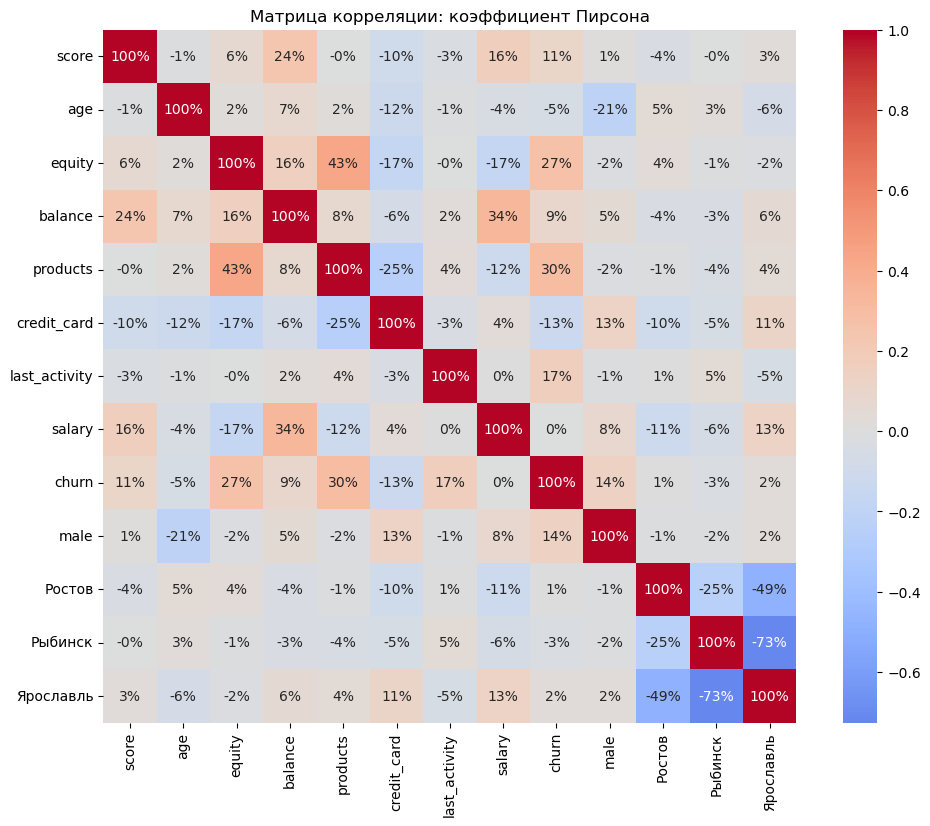

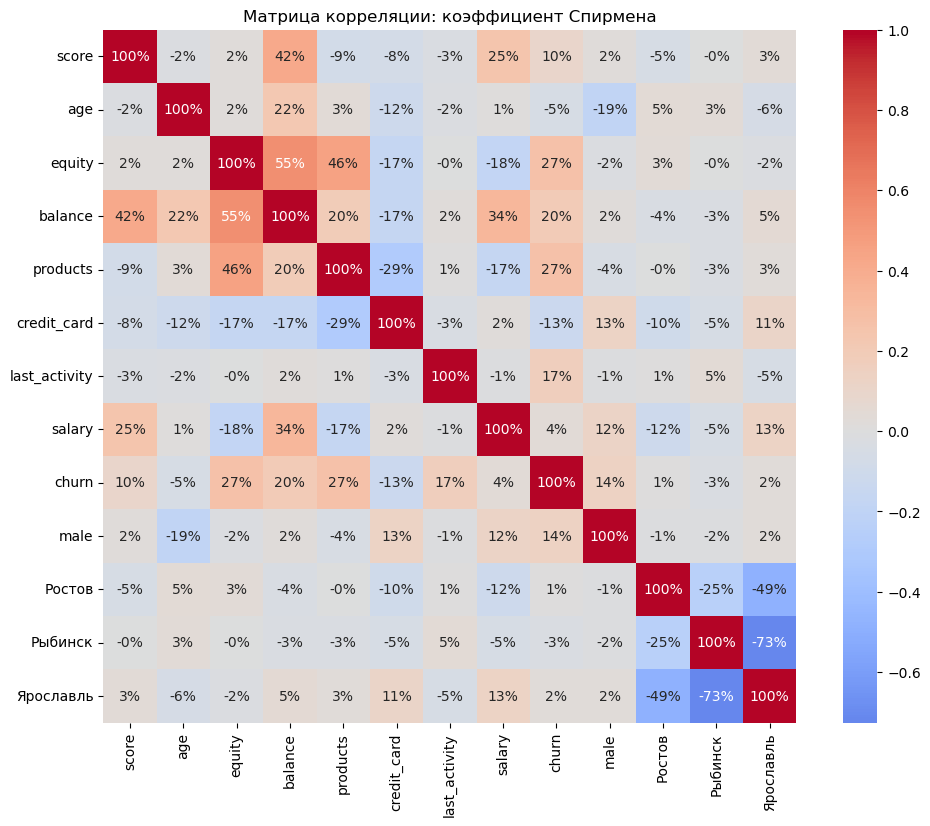

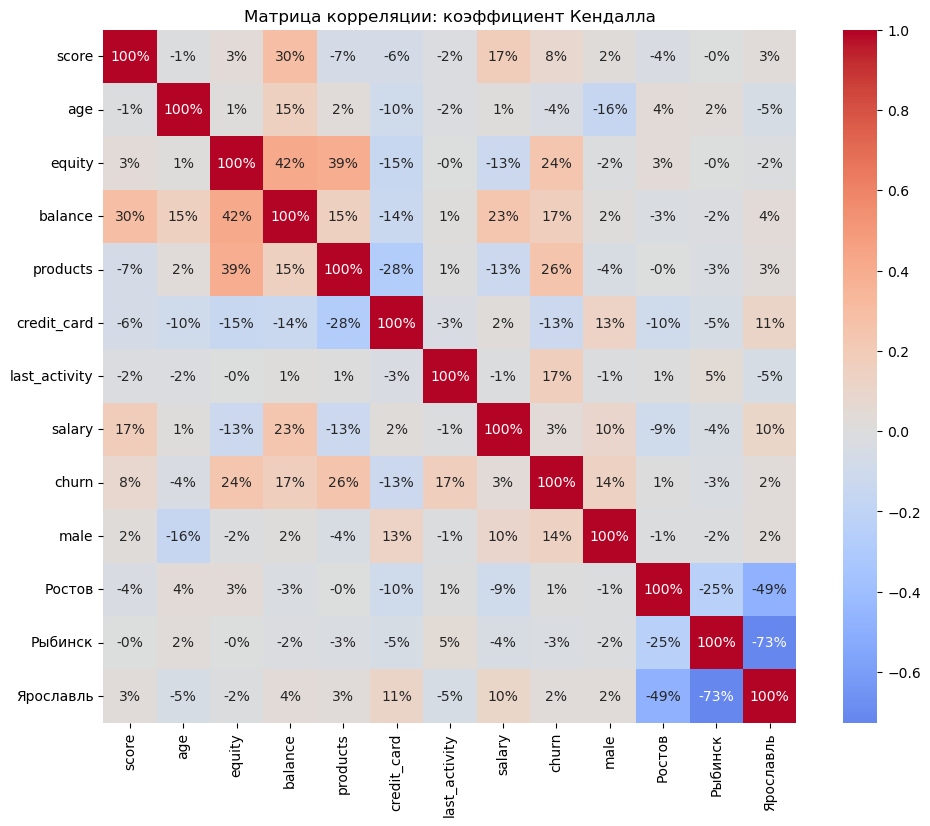

In [47]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.drop(columns=['user_id', 'has_balance']).corr(), annot=True, fmt='.0%', square=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции: коэффициент Пирсона')
plt.show()

plt.figure(figsize=(12, 9))
sns.heatmap(data.drop(columns=['user_id', 'has_balance']).corr(method='spearman'), annot=True, fmt='.0%', square=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции: коэффициент Спирмена')
plt.show()

plt.figure(figsize=(12, 9))
sns.heatmap(data.drop(columns=['user_id', 'has_balance']).corr(method='kendall'), annot=True, fmt='.0%', square=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции: коэффициент Кендалла')
plt.show()

Все три матрицы достаточно похожи, но есть и некоторые различия.

Выделим значимые пары признаков по силе связи от сильной до умеренной и отметим различия между коэффициентами.

**Сильная связь (90-100%)**
- не выявлена

**Высокая связь (70-90%)**
- не выявлена

**Заметная связь (50-70%)**
- баланс - количество баллов собственности (Спирмен)

**Умеренная связь (30-50%)**
- количество банковских продуктов - количество баллов собственности (Пирсон, Спирмен, Кендалл)
- доход - баланс (Пирсон, Спирмен)
- баланс - кредитный скоринг (Спирмен)
- баланс - количество баллов собственности (Кендалл)

Также можем отметить, что в Ярославле зарабатывают чуть лучше, чем в других городах, а мужчины имеют более высокий доход, чем женщины.

При формировании сегментов стоит учесть выявленные взаимосвязи, так как эти признаки могут усилить влияние друг друга. Однако нашим целевым признаком является признак отточности, поэтому целесообразно выявить взаимосвязи всех признаков именно с признаком отточности. Воспользуемся теми же методами.

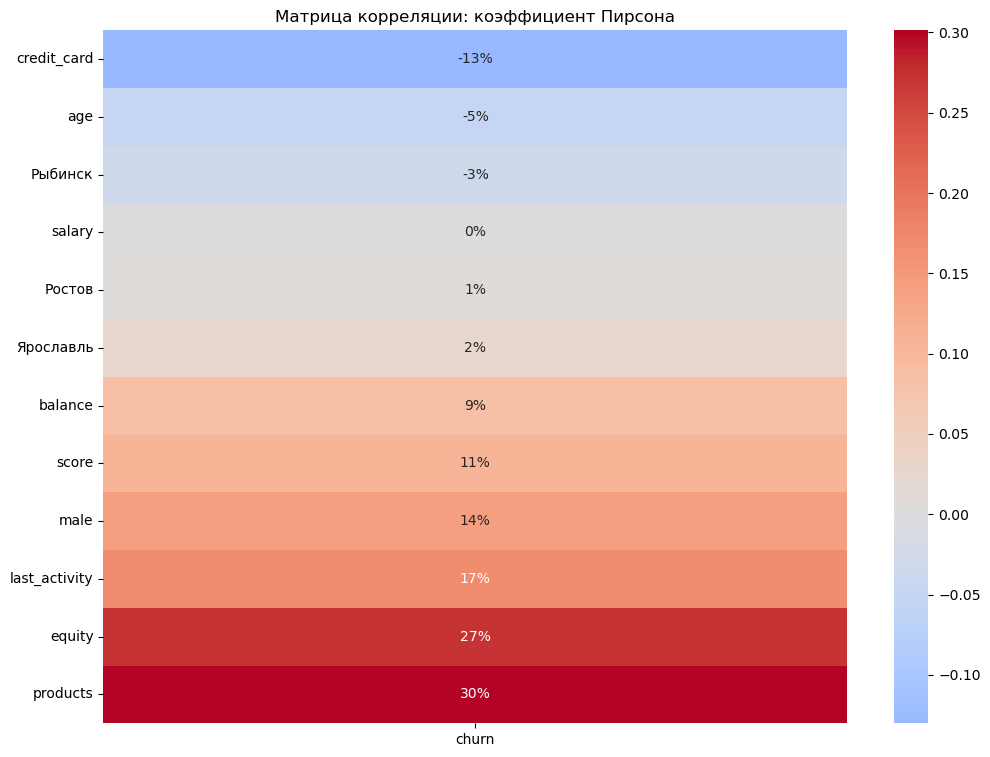

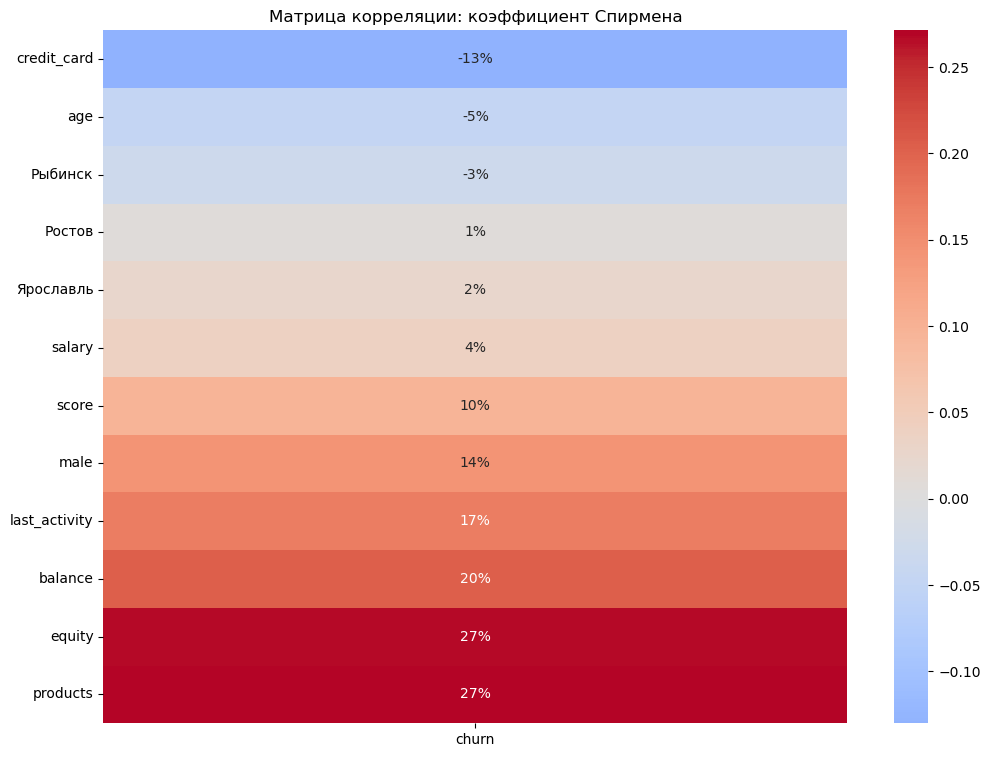

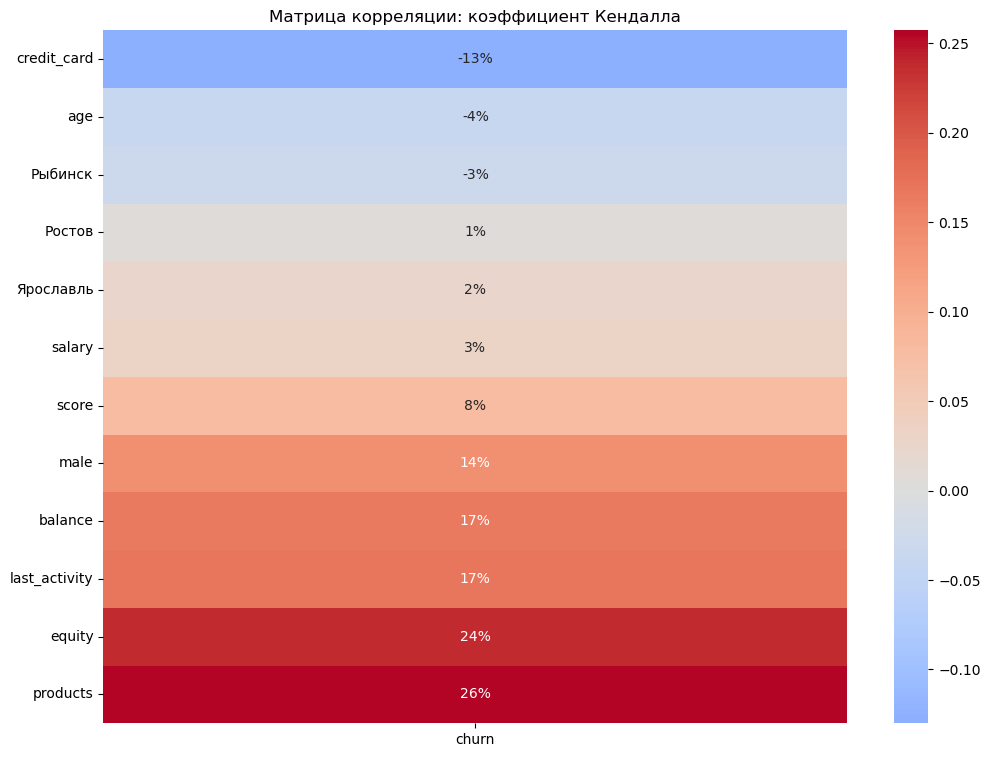

In [48]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.drop(columns=['user_id', 'has_balance']).corr().loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt='.0%', cmap='coolwarm', center=0)
plt.title('Матрица корреляции: коэффициент Пирсона')
plt.show()

plt.figure(figsize=(12, 9))
sns.heatmap(data.drop(columns=['user_id', 'has_balance']).corr(method='spearman').loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt='.0%', cmap='coolwarm', center=0)
plt.title('Матрица корреляции: коэффициент Спирмена')
plt.show()


plt.figure(figsize=(12, 9))
sns.heatmap(data.drop(columns=['user_id', 'has_balance']).corr(method='kendall').loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt='.0%', cmap='coolwarm', center=0)
plt.title('Матрица корреляции: коэффициент Кендалла')
plt.show()

Выявлена слабая связь признака отточности со следующими признаками:
- количество банковских продуктов (Пирсон, Спирмен, Кендалл)
- количество баллов собственности (Пирсон, Спирмен, Кендалл)
- баланс (Спирмен, Кендалл)
- активность в последнее время (Пирсон, Спирмен, Кендалл)
- принадлежность к мужскому полу (Пирсон, Спирмен, Кендалл)
- наличие кредитной карты (обратная связь, Пирсон, Спирмен, Кендалл)

Признак наличия баланса счёта мы исключили из анализа, так как он затрагивает очень широкий круг клиентов (мы формировали его исходя из наличия или отсутствия пропусков в столбце `balance`, а пропусков было 22,95%). Так как мы ранее установили, что у большей части клиентов с пропусками в столбце `balance` есть кредитная карта, вероятно, именно ее наличие или отсутствие является более важным фактором, определяющим вероятность ухода клиента.

Отметим также отсутствие связи между доходом клиента и вероятностью ухода. При этом доход коррелирует с размером баланса счёта, а он, в свою очередь - с количеством банковских продуктов и баллов собственности. Последние показатели более сильно связано с признаком отточности. Похоже, наличие высокого дохода само по себе не влияет на решение клиента покинуть банк, а вот те блага, которые приходят вместе с доходом (деньги на счёте, собственность, возможность брать кредиты) могут иметь отношение к взаимодействию клиента с банком и влиять на его решения.

Проверим часть этих предположений в следующем разделе методами статистического анализа.

## Статистический анализ

Исходя из ранее полученных данных нас интересует проверка следующих предположений:
- действительно ли уровень дохода не влияет на вероятность оттока
- склонны ли более богатые люди (с большим балансом счёта) отказываться от услуг банка
- удерживает ли наличие кредитной карты клиентов от ухода из банка

В следующем разделе сформулируем гипотезы и опишем методы их проверки.

### Формулировка гипотез

#### Гипотеза о равенстве среднего дохода отточных и неотточных клиентов
Так как нас интересует сам факт равенства или неравенства, гипотеза будет двусторонней. Используемые критерии:
- t-критерий Стьюдента
- U-критерий Манна-Уитни

Требования к данным:
- t-критерий:
    - независимость выборок
    - нормальное распределение
    - равенство дисперсий 
    - отсутствие большого количества выбросов
- U-критерий:
    - независимость выборок
    - выборки небольшого размера
    - отсутствие или малое количество совпадающих значений
    
Сразу можем отметить очевидную проблему: данных у нас много, в столбце `salary` присутствуют выбросы в значительных количествах. Неравенство дисперсий можно скомпенсировать параметром `equal_var`. Нормальность распределения проверим дополнительно критерием Шапиро-Уилка. Сравним полученные результаты и определим, какому тесту мы можем доверять больше.

Уровень статистической значимости стандартный: 0,05.

Нулевая гипотеза: значимых различий между средними доходами у отточных и неотточных клиентов нет.

Альтернативная гипотеза: между средними доходами отточных и неотточных клиентов есть значимая разница.

#### Гипотеза о равенстве среднего баланса счёта отточных и неотточных клиентов
Здесь мы хотели бы проверить, превышает ли средний размер баланса счёта отточных клиентов средний размер баланса неотточных клиентов. Гипотеза односторонняя, используемый критерий: t-критерий Стьюдента.

Уровень статистической значимости: 0,05.

Нулевая гипотеза: значимых различий между средним балансом счёта у отточных и неотточных клиентов нет.

Альтернативная гипотеза: средний баланс счёта у отточных клиентов выше, чем у неотточных.

#### Гипотеза о равенстве долей отточных клиентов среди владельцев кредитных карт и лиц, не владеющих ею
Для оценки равенства долей используем z-тест на уровне статистической значимости 0,05.

Нулевая гипотеза: значимых различий между долями отточных клиентов между владельцами кредитных карт и лицами, ими не владеющими, нет.

Альтернативная гипотеза: доли отточных клиентов отличаются в зависимости от наличия или отсутствия кредитной карты у клиентов.

### Проверка гипотез

#### Проверка гипотезы о равенстве среднего дохода

Проверим равенство средних значений дохода у отточных и неотточных клиентов с помощью t-критерия и U-критерия.


In [49]:
# проверка гипотезы t-критерием

# задаем уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(data.query('churn == 1')['salary'], data.query('churn == 0')['salary'], equal_var=False)

print('Нулевая гипотеза: значимых различий между средними доходами у отточных и неотточных клиентов нет.')
print('Альтернативная гипотеза: между средними доходами отточных и неотточных клиентов есть значимая разница.\n')

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\n') 

print('Средний доход отточных клиентов:', round(data.query('churn == 1')['salary'].mean()), 'руб.')
print('Средний доход неотточных клиентов:', round(data.query('churn == 0')['salary'].mean()), 'руб.')

# соотношение среднего дохода отточных клиентов относительно среднего дохода неотточных 
print(f"Относительная разница среднего дохода отточных и неотточных клиентов составлет {round(100*(data.query('churn == 1')['salary'].mean() / data.query('churn == 0')['salary'].mean() - 1), 2)}%.")

Нулевая гипотеза: значимых различий между средними доходами у отточных и неотточных клиентов нет.
Альтернативная гипотеза: между средними доходами отточных и неотточных клиентов есть значимая разница.

p-значение:  0.8354803526840116
Не получилось отвергнуть нулевую гипотезу.

Средний доход отточных клиентов: 148357 руб.
Средний доход неотточных клиентов: 147675 руб.
Относительная разница среднего дохода отточных и неотточных клиентов составлет 0.46%.


t-критерий не обнаружил статистически значимой разницы между средними доходами отточных и неотточных клиентов.

In [50]:
# проверка u-критерием

# задаем уровень статистической значимости
alpha = 0.05

results = st.mannwhitneyu(data.query('churn == 1')['salary'], data.query('churn == 0')['salary'])

print('Нулевая гипотеза: значимых различий между средними доходами у отточных и неотточных клиентов нет.')
print('Альтернативная гипотеза: между средними доходами отточных и неотточных клиентов есть значимая разница.\n')

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Нулевая гипотеза: значимых различий между средними доходами у отточных и неотточных клиентов нет.
Альтернативная гипотеза: между средними доходами отточных и неотточных клиентов есть значимая разница.

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу.



Для U-критерия разница в 0,46% от среднего дохода неотточных клиентов оказалась статистически значимой.

Результат, полученный с помощью t-критерия, кажется более достоверным по следующим причинам:
- эмпирическая разница в 0,46% весьма невелика
- размеры выборок (1818 для отточных клиентов и 8155 для неотточных) на порядок превышают размер выборки, рекомендуемый для проведения теста с использованием U-критерия (не более 100)

Однако, как мы уже упоминали, данные по доходу клиентов имеют значительные выбросы, которые могут сильно сдвигать среднее значение от истинного центрального. Исследуем распределение данных с помощью критерия Шапиро-Уилка, но оценивать будем не по pvalue, а по статистике самого теста (так как неотточных клиентов больше 5000, pvalue для этой выборки может отображаться некорректно). Чем ближе статистика к 1, тем более вероятно, что величина распределена нормально.

In [51]:
print(f"Данных в выборке для отточных клиентов: {len(data.query('churn == 1')['salary'])}")
print(f"Данных в выборке для неотточных клиентов: {len(data.query('churn == 0')['salary'])}\n")

print(f"Значение статистики теста для отточных клиентов: {st.shapiro(data.query('churn == 1')['salary'])[0]}")
print(f"Значение статистики теста для неотточных клиентов: {st.shapiro(data.query('churn == 0')['salary'])[0]}")

Данных в выборке для отточных клиентов: 1818
Данных в выборке для неотточных клиентов: 8155

Значение статистики теста для отточных клиентов: 0.6440237760543823
Значение статистики теста для неотточных клиентов: 0.6149197816848755


Значения достаточно удалены от 1, а это значит, что распределение далеко от нормального.

Величиной, более устойчивой к выбросам, является медиана. Применим критерий Муда и выясним, есть ли различия между медианными значениями дохода у отточных и неотточных клиентов.

In [52]:
# проверка гипотезы критерием Муда

# задаем уровень статистической значимости
alpha = 0.05

results = st.median_test(data.query('churn == 1')['salary'], data.query('churn == 0')['salary'])

print('Нулевая гипотеза: значимых различий между медианными доходами у отточных и неотточных клиентов нет.')
print('Альтернативная гипотеза: между медианными доходами отточных и неотточных клиентов есть значимая разница.\n')

print('p-значение: ', results[1])
if results[1] < alpha:
    print('Отвергаем нулевую гипотезу.\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\n') 

print('Медианный доход отточных клиентов:', data.query('churn == 1')['salary'].median(), 'руб.')
print('Медианный доход неотточных клиентов:', data.query('churn == 0')['salary'].median(), 'руб.')

# соотношение медианного дохода отточных клиентов относительно медианного дохода неотточных 
print(f"Относительная разница медианного дохода отточных и неотточных клиентов составлет {round(100*(data.query('churn == 1')['salary'].median() / data.query('churn == 0')['salary'].median() - 1), 2)}%.")

Нулевая гипотеза: значимых различий между медианными доходами у отточных и неотточных клиентов нет.
Альтернативная гипотеза: между медианными доходами отточных и неотточных клиентов есть значимая разница.

p-значение:  0.001398971212145682
Отвергаем нулевую гипотезу.

Медианный доход отточных клиентов: 125408.88 руб.
Медианный доход неотточных клиентов: 118227.6 руб.
Относительная разница медианного дохода отточных и неотточных клиентов составлет 6.07%.


Разница в медианном доходе гораздо более существенная.

Таким образом, хотя t-критерий и не выявил различий между средними значениями дохода отточных и неотточных клиентов, непараметрические тесты лучше обнаруживают разницу, так как средние значения искажаются из-за наличия выбросов. Уровень дохода отточных клиентов выше, чем неотточных.

#### Поверка гипотезы о равенстве среднего баланса счёта отточных и неотточных клиентов

In [53]:
# проверка t-критерием

# задаем уровень статистической значимости
alpha = 0.05

# так как в данных есть пропуски, передаем методу параметр nan_policy='omit'
results = st.ttest_ind(data.query('churn == 1')['balance'], data.query('churn == 0')['balance'], alternative='greater', equal_var=False, nan_policy='omit')

print('Нулевая гипотеза: значимых различий между средним балансом счёта у отточных и неотточных клиентов нет.')
print('Альтернативная гипотеза: средний баланс счёта у отточных клиентов выше, чем у неотточных.\n')

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\n')

print('Средний баланс счёта отточных клиентов:', round(data.query('churn == 1')['balance'].mean()), 'руб.')
print('Средний баланс счёта неотточных клиентов:', round(data.query('churn == 0')['balance'].mean()), 'руб.')

# соотношение среднего баланса счёта отточных клиентов относительно среднего баланса счета неотточных 
print(f"Относительная разница среднего баланса счёта отточных и неотточных клиентов составлет {round(100*(data.query('churn == 1')['balance'].mean() / data.query('churn == 0')['balance'].mean() - 1), 2)}%.")

Нулевая гипотеза: значимых различий между средним балансом счёта у отточных и неотточных клиентов нет.
Альтернативная гипотеза: средний баланс счёта у отточных клиентов выше, чем у неотточных.

p-значение:  8.658704289556468e-14
Отвергаем нулевую гипотезу.

Средний баланс счёта отточных клиентов: 1134458 руб.
Средний баланс счёта неотточных клиентов: 733032 руб.
Относительная разница среднего баланса счёта отточных и неотточных клиентов составлет 54.76%.


Нулевая гипотеза отвергнута: средний баланс счёта у отточных клиентов выше, чем у неотточных (согласно эмпирическим данным - выше на 54,76% от среднего баланса неотточных клиентов).

Такая большая разница средних значений балансов, вероятно, объясняется влиянием выбросов. Попробуем проверить гипотезу на срезе данных и посмотреть, насколько сильно выбросы влияют на результат.

In [54]:
# проверка t-критерием

# задаем уровень статистической значимости
alpha = 0.05

# делаем срез данных о балансе по 95 перцентилю
df = data[data['balance'] < np.nanpercentile(data['balance'], 95)]

results = st.ttest_ind(df.query('churn == 1')['balance'], df.query('churn == 0')['balance'], alternative='greater')

print('Нулевая гипотеза: значимых различий между средним балансом счёта у отточных и неотточных клиентов нет.')
print('Альтернативная гипотеза: средний баланс счёта у отточных клиентов выше, чем у неотточных.\n')

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\n')

print('Средний баланс счёта отточных клиентов:', round(df.query('churn == 1')['balance'].mean()), 'руб.')
print('Средний баланс счёта неотточных клиентов:', round(df.query('churn == 0')['balance'].mean()), 'руб.')

# соотношение среднего баланса счёта отточных клиентов относительно среднего баланса счета неотточных 
print(f"Относительная разница среднего баланса счёта отточных и неотточных клиентов составлет {round(100*(df.query('churn == 1')['balance'].mean() / df.query('churn == 0')['balance'].mean() - 1), 2)}%.")

Нулевая гипотеза: значимых различий между средним балансом счёта у отточных и неотточных клиентов нет.
Альтернативная гипотеза: средний баланс счёта у отточных клиентов выше, чем у неотточных.

p-значение:  9.847247134246833e-65
Отвергаем нулевую гипотезу.

Средний баланс счёта отточных клиентов: 785150 руб.
Средний баланс счёта неотточных клиентов: 575593 руб.
Относительная разница среднего баланса счёта отточных и неотточных клиентов составлет 36.41%.


Даже при значительном сокращении количества выбросов результат прежний: средний баланс счёта отточных клиентов выше, чем средний баланас счёта неотточных клиентов.

Дополнительно проверим равенство медианных значений критерием Муда.

In [55]:
# проверка гипотезы критерием Муда

# задаем уровень статистической значимости
alpha = 0.05

results = st.median_test(data.query('churn == 1')['balance'], data.query('churn == 0')['balance'], nan_policy='omit')

print('Нулевая гипотеза: значимых различий между медианным балансом счёта у отточных и неотточных клиентов нет.')
print('Альтернативная гипотеза: между медианным балансом счёта отточных и неотточных клиентов есть значимая разница.\n')

print('p-значение: ', results[1])
if results[1] < alpha:
    print('Отвергаем нулевую гипотезу.\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\n') 

print('Медианный баланс счёта отточных клиентов:', data.query('churn == 1')['balance'].median(), 'руб.')
print('Медианный баланс счёта неотточных клиентов:', data.query('churn == 0')['balance'].median(), 'руб.')

# соотношение медианного баланса счёта отточных клиентов относительно медианного баланса неотточных 
print(f"Относительная разница медианным балансом счёта отточных и неотточных клиентов составлет {round(100*(data.query('churn == 1')['balance'].median() / data.query('churn == 0')['balance'].median() - 1), 2)}%.")

Нулевая гипотеза: значимых различий между медианным балансом счёта у отточных и неотточных клиентов нет.
Альтернативная гипотеза: между медианным балансом счёта отточных и неотточных клиентов есть значимая разница.

p-значение:  4.999558500445622e-43
Отвергаем нулевую гипотезу.

Медианный баланс счёта отточных клиентов: 783908.8999999999 руб.
Медианный баланс счёта неотточных клиентов: 475410.09 руб.
Относительная разница медианным балансом счёта отточных и неотточных клиентов составлет 64.89%.


Разница между медианными значениями баланса счёта есть, и она довольно велика.

#### Проверка гипотезы о равенстве долей отточных клиентов среди владельцев кредитных карт и лиц, не владеющих ею

In [56]:
# делаем срезы по группам
credit_card = data[data['credit_card'] == 1]
no_credit_card = data[data['credit_card'] == 0]

# определеяем общее количество пользователей и количество пользователей, совершивших событие, в каждой группе
total_clients = np.array([credit_card['user_id'].count(), no_credit_card['user_id'].count()])
leaving_clients = np.array([credit_card[credit_card['churn'] == 1]['user_id'].count(), no_credit_card[no_credit_card['churn'] == 1]['user_id'].count()])

# задаем уровень статистической значимости
alpha = 0.05
    
# доля пользователей, совершивших событие, в первой группе:
p1 = leaving_clients[0]/total_clients[0]

# доля пользователей, совершивших событие, во второй группе:
p2 = leaving_clients[1]/total_clients[1]    
    
# доля пользователей, совершивших событие, в комбинированном датасете:
p_combined = (leaving_clients[0] + leaving_clients[1]) / (total_clients[0] + total_clients[1])    
    
# разница долей в группах
difference = p1 - p2 
    
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/total_clients[0] + 1/total_clients[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
    
print('Нулевая гипотеза: значимых различий между долями отточных клиентов между владельцами кредитных карт и лицами, ими не владеющими, нет.')
print('Альтернативная гипотеза: доли отточных клиентов отличаются в зависимости от наличия или отсутствия кредитной карты у клиентов.\n')

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\n')

print(f"Доля отточных клиентов среди владельцев кредитных карт: {round(100*p1)}%")
print(f"Доля отточных клиентов среди лиц, не владеющих кредитными картами: {round(100*p2)}%")

Нулевая гипотеза: значимых различий между долями отточных клиентов между владельцами кредитных карт и лицами, ими не владеющими, нет.
Альтернативная гипотеза: доли отточных клиентов отличаются в зависимости от наличия или отсутствия кредитной карты у клиентов.

p-значение:  0.0
Отвергаем нулевую гипотезу.

Доля отточных клиентов среди владельцев кредитных карт: 15%
Доля отточных клиентов среди лиц, не владеющих кредитными картами: 26%


Нулевая гипотеза отвергнута: разница между долями отточных клиентов в зависимости от наличия или отсутствия кредитной карты есть, и она статистически значима.

Таким образом, мы смогли проверить наши предположения статистическими методами:
- уровень дохода отточных и неотточных клиентов отличается
- средний баланс счёта у отточных клиентов выше, чем у неотточных
- наличие кредитной карты удерживает клиента от ухода из банка

## Промежуточные итоги

Перед тем, как выделить отточные сегменты, резюмируем полученные сведения.

**Типичные портреты отточного клиента и обычного клиента**
- в среднем отточный клиент зарабатывает чуть больше, чем обычный
- денег на балансе счета у отточного клиента больше, чем у обычного
- его кредитный скоринг чуть выше, чем у обычного
- собственности у отточного клиента больше, чем у обычного
- и тот, и другой клиент - мужчина средних лет (отточный чуть моложе) из Ярославля, обладатель кредитной карты, который - проявлял активность в последние три месяца

**Признаки и интервалы признаков, связанные с повышенной долей отточных клиентов**
- возраст: 24-35, 50-59
- кредитный скоринг: 820-909, 920-939
- баланс счета: от 725 тыс.руб.
- доход: 80-90 тыс.руб., 100-140 тыс.руб., 150-220 тыс.руб., 250-270 тыс.руб., 290-310 тыс.руб.
- количество банковских продуктов: 2 и больше
- город: Ярославль, Ростов
- пол: мужской
- количество баллов собственности: 3 и больше
- наличие кредитной карты: нет
- активность за последние 3 месяца: есть

**Корреляция между признаками**

- заметная:
    - баланс - количество баллов собственности
- умеренная:
    - количество банковских продуктов - количество баллов собственности
    - баланс - доход
    - баланс - кредитный скоринг
- слабая связь с признаком отточности:
    - количество банковских продуктов
    - количество баллов собственности
    - баланс
    - активность за последние три месяца
    - принадлежность к мужскому полу
    - наличие кредитной карты
    
**Наблюдения, подтвержденные при проверке статистических гипотез**
- уровень дохода отточных и неотточных клиентов отличается
- средний баланс счёта у отточных клиентов выше, чем у неотточных
- наличие кредитной карты удерживает клиента от ухода из банка

### Отбор признаков и интервалов значений для выделения сегментов

Для выделения сегментов отберем следующие признаки и интервалы значений:
- баланс счёта: от 725 тыс.руб. (коррелирует с другими признаками и отточностью, пороговое значение выведено при изучении совместной плотности распределения баланса отточных и неотточных клиентов)
- доход: от 100 тыс.руб. (коррелирует с другими признаками, пороговое значение выведено при изучении совместной плотности распределения дохода отточных и неотточных клиентов - у клиентов с доходом ниже этого значения склонность к оттоку наблюдается в меньшей степени)
- баллы кредитного скоринга: 820-920 (коррелирует с другими признаками, пороговое значение выведено при изучении совместной плотности распределения скоринга отточных и неотточных клиентов)
- баллы собственности: больше 3 (коррелирует с другими признаками и отточностью, доля оттока выше средней)
- наличие кредитной карты: нет (коррелирует с другими признаками и отточностью, доля отточности выше среди клиентов, не владеющих кредитной картой - подтверждено при проверке гипотезы)
- пол: мужской (коррелирует с отточностью, доля отточности у мужчин выше, чем у женщин)
- количество банковских продуктов: 2 и более (коррелирует с другими признаками и отточностью; большинство клиентов пользуются 2 продуктами, и доля оттока у них выше средней, но у пользователей 3 и более продуктами она выше)
- возраст: 24-35 и 50-59 лет (диапазоны не совпадают со срелним возрастом типичного клиента, выделены при изучении совместной плотности распределения возраста отточных и неотточных клиентов)
- активность в последние три месяца: есть (коррелирует с отточностью, доля оттока выше средней)
- город: Ярославль (доля оттока выше средней)

### Отбор наборов значений 
Для формирования сегментов нам необходимо объединить несколько признаков, по которым мы будем отбирать клиентов. Выберем количественные признаки и построим график совместного распределения с разделением по признаку оттока. Для большей компактности сделаем срез по 95 перцентилю по значениям баланса и заработной платы.

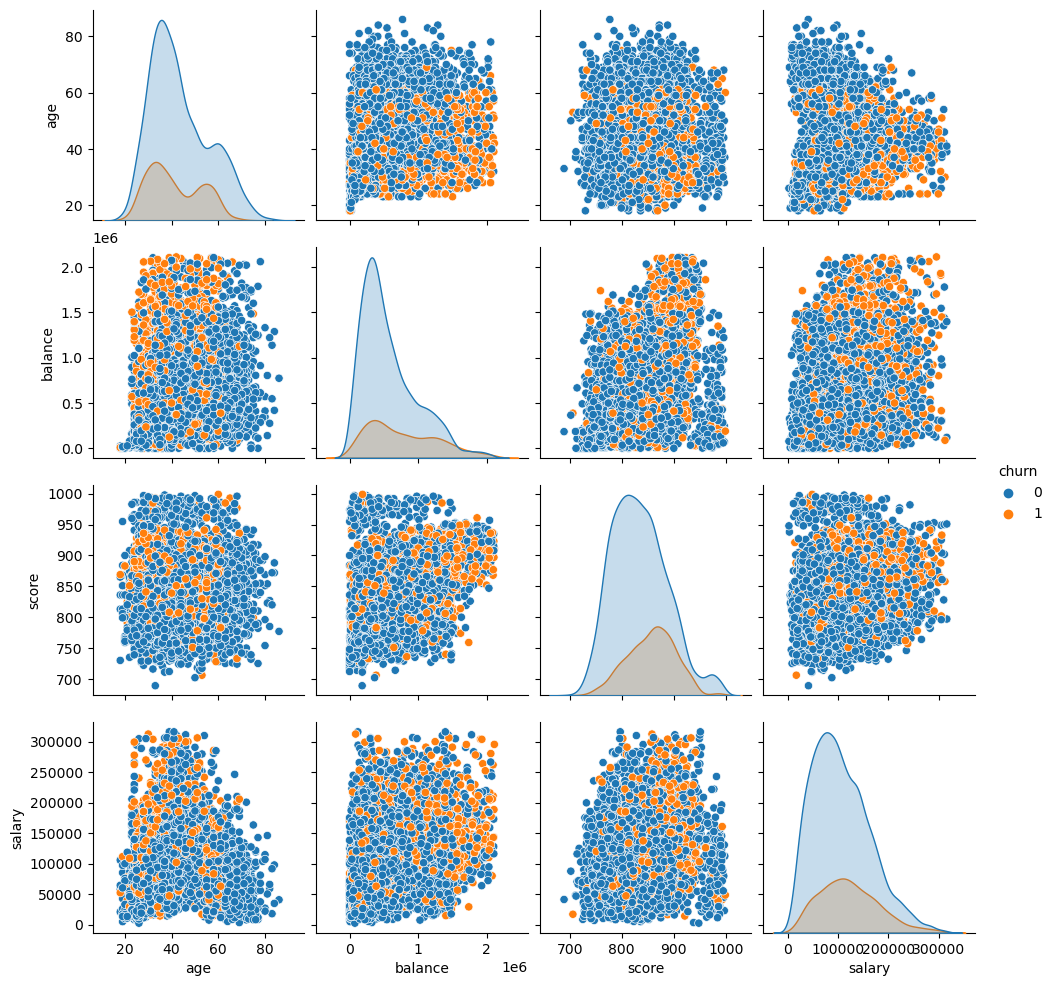

In [57]:
# формируем данные для визуализации
short = data[(data['balance'] < np.nanpercentile(data['balance'], 95)) & (data['salary'] < np.nanpercentile(data['salary'], 95))][['churn', 'age', 'balance', 'score', 'salary']]

sns.pairplot(short, hue='churn')
plt.show()

Можем выделить следующие пары признаков, графики которых демонстируют более или менее отчетливые кластеры отточных клиентов:
- возраст - баланс
- баланс - доход
- кредитный скоринг - баланс

Добавив к указанным парам признаков категориальные признаки мы сможем сформировать сегменты.

## Сегменты

Сформируем следующие сегменты:
- клиенты среднего возраста с большим балансом счета:
    - возраст 50-59 лет
    - баланс счета > 725 тыс.руб. 
- молодые обеспеченные клиенты из Ярославля:
    - возраст 24-35 лет
    - баланс счета > 725 тыс.руб
    - город Ярославль
- богатые мужчины среднего возраста:
    - пол мужской
    - возраст 50-59 лет
    - доход > 100 тыс.руб.
- обеспеченные молодые клиенты и клиенты среднего возраста с кредитным рейтингом выше среднего без кредитной карты:
    - возраст менее 50 лет
    - баланс счета > 725 тыс.руб.
    - кредитный рейтинг 820-920 баллов
    - кредитная карта отсутствует
- владельцы собственности и активные пользователи продуктов банка:
    - баллы собственности более 3
    - продуктов банка более 1
    - проявляли активность в последнее время
    
По каждому сегменту рассчитаем количество клиентов и долю отточных клиентов.

In [58]:
print('Сегмент: клиенты среднего возраста с большим балансом счета')
print(data.query('50 < age < 59 and balance > 725000').agg({"churn":["mean","sum","count"]}), '\n')
print('Сегмент: молодые обеспеченные клиенты из Ярославля')
print(data.query('24 < age < 35 and balance > 725000 and city == "Ярославль"').agg({"churn":["mean","sum","count"]}), '\n')
print('Сегмент: богатые мужчины среднего возраста')
print(data.query('gender == "М" and salary > 100000 and 50 < age < 59').agg({"churn":["mean","sum","count"]}), '\n')
print('Сегмент: обеспеченные клиенты младше 50 лет с кредитным рейтингом выше среднего без кредитной карты')
print(data.query('age < 50 and balance > 725000 and 820 <= score <= 920 and credit_card == 0').agg({"churn":["mean","sum","count"]}), '\n')
print('Сегмент: владельцы собственности и активные пользователи продуктов банка')
print(data.query('equity > 3 and products > 1 and last_activity == 1').agg({"churn":["mean","sum","count"]}), '\n')

Сегмент: клиенты среднего возраста с большим балансом счета
            churn
mean     0.467532
sum    216.000000
count  462.000000 

Сегмент: молодые обеспеченные клиенты из Ярославля
            churn
mean     0.545455
sum    192.000000
count  352.000000 

Сегмент: богатые мужчины среднего возраста
            churn
mean     0.320242
sum    106.000000
count  331.000000 

Сегмент: обеспеченные клиенты младше 50 лет с кредитным рейтингом выше среднего без кредитной карты
            churn
mean     0.502183
sum    230.000000
count  458.000000 

Сегмент: владельцы собственности и активные пользователи продуктов банка
            churn
mean      0.41353
sum     758.00000
count  1833.00000 



Сегменты "богатые мужчины среднего возраста" не соответствует требованию по уровню отточности.

Сегменты "клиенты среднего возраста с большим балансом счета" и "обеспеченные клиенты младше 50 лет с кредитным рейтингом выше среднего без кредитной карты" пересекаются по размеру баланса счёта, но не пересекаются по возрасту. Сегменты высокоотточные, соответствуют требованиям по количеству клиентов.

Сегмент "владельцы собственности и активные пользователи продуктов банка" самый многочисленный, так как сформирован по достаточно многочисленным категориям. Соответствует требованию по уровню отточности.

Сегмент "молодые обеспеченные клиенты из Ярославля" пересекаетс с сегментом "клиенты среднего возраста с большим балансом счета" по балансу, но не пересекается по возрасту. Сегменты высокоотточные, соответствуют требованиям по количеству клиентов.

Самый отточный сегмент: молодые обеспеченные клиенты из Ярославля - 54,5% отточных клиентов.

### Визуализация сегментов

Пронумеруем и расположим сегменты по уменьшению доли отточных клиентов.

In [59]:
# заменим численное обозначение признака оттока текстовым
fig = px.pie(data.query('24 < age < 35 and balance > 725000 and city == "Ярославль"').groupby('churn_text').agg(count=('churn','count')).reset_index().sort_values('churn_text', ascending=False), values='count', names='churn_text', width=700, height=700, color_discrete_sequence=['red', 'green'])
fig.update_layout(title=dict(text='Сегмент 1: молодые обеспеченные клиенты из Ярославля', font=dict(size=15)))
fig.update_traces(sort=False)
fig.show()

fig = px.pie(data.query('age < 50 and balance > 725000 and 820 <= score <= 920 and credit_card == 0').groupby('churn_text').agg(count=('churn','count')).reset_index().sort_values('churn_text', ascending=False), values='count', names='churn_text', width=700, height=700, color_discrete_sequence=['red', 'green'])
fig.update_layout(title=dict(text=f'Сегмент 2: платежеспособные клиенты младше 50 лет без кредитной карты', font=dict(size=15)))
fig.update_traces(sort=False)
fig.show()

fig = px.pie(data.query('50 < age < 59 and balance > 725000').groupby('churn_text').agg(count=('churn','count')).reset_index().sort_values('churn_text', ascending=False), values='count', names='churn_text', width=700, height=700, color_discrete_sequence=['red', 'green'])
fig.update_layout(title=dict(text='Сегмент 3: клиенты среднего возраста с большим балансом счета', font=dict(size=15)))
fig.update_traces(sort=False)
fig.show()

fig = px.pie(data.query('equity > 3 and products > 1 and last_activity == 1').groupby('churn_text').agg(count=('churn','count')).reset_index().sort_values('churn_text', ascending=False), values='count', names='churn_text', width=700, height=700, color_discrete_sequence=['red', 'green'])
fig.update_layout(title=dict(text=f'Сегмент 4: владельцы собственности и активные пользователи продуктов банка', font=dict(size=15)))
fig.update_traces(sort=False)
fig.show()

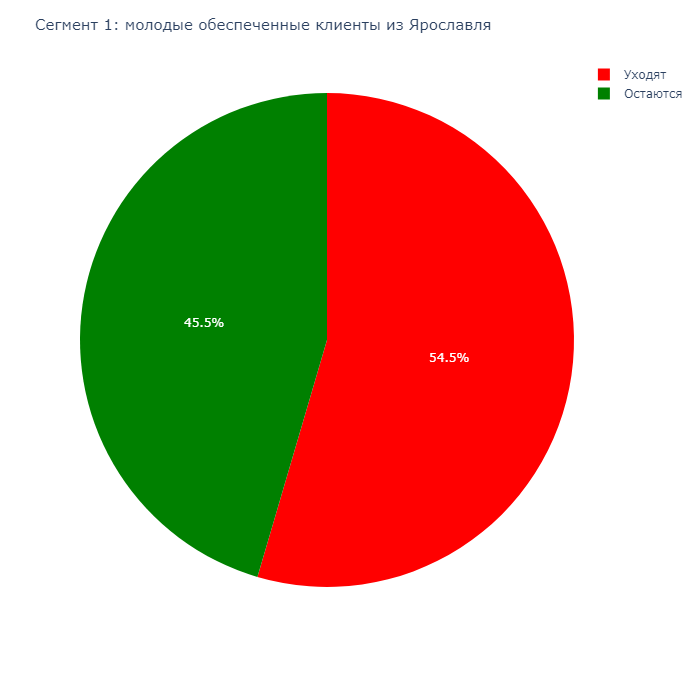

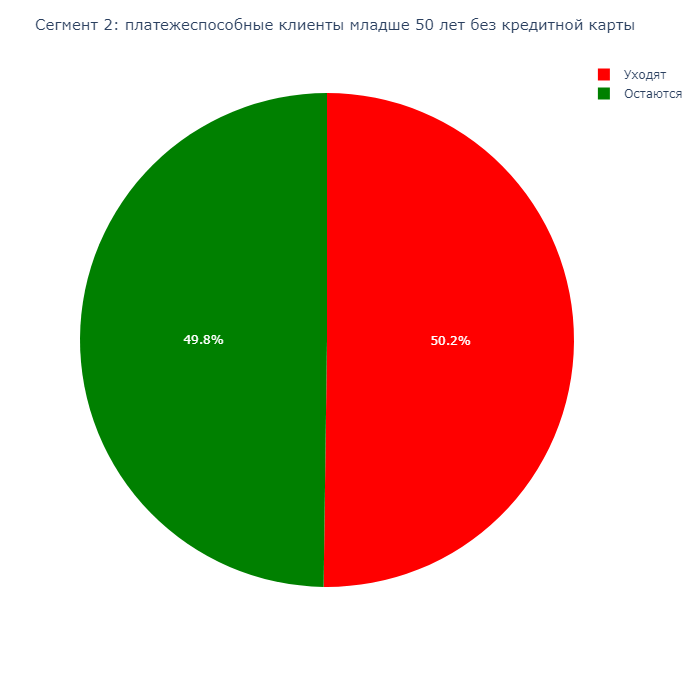

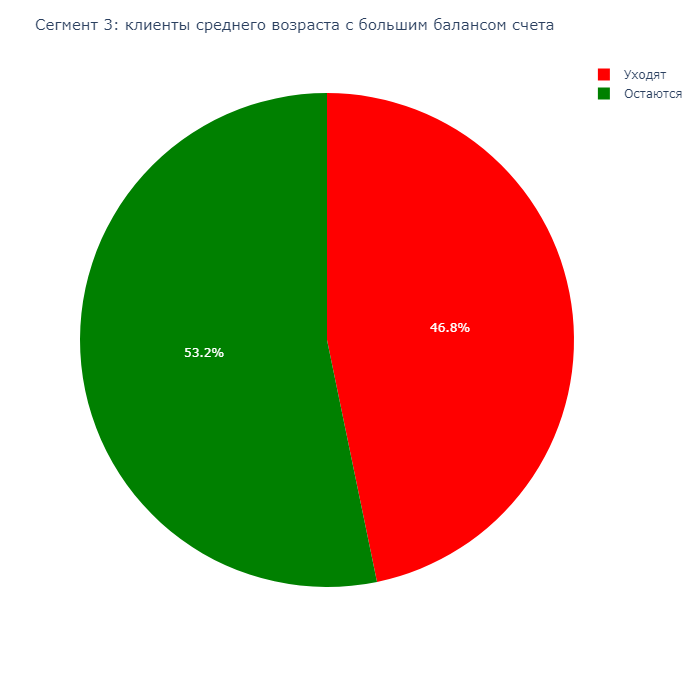

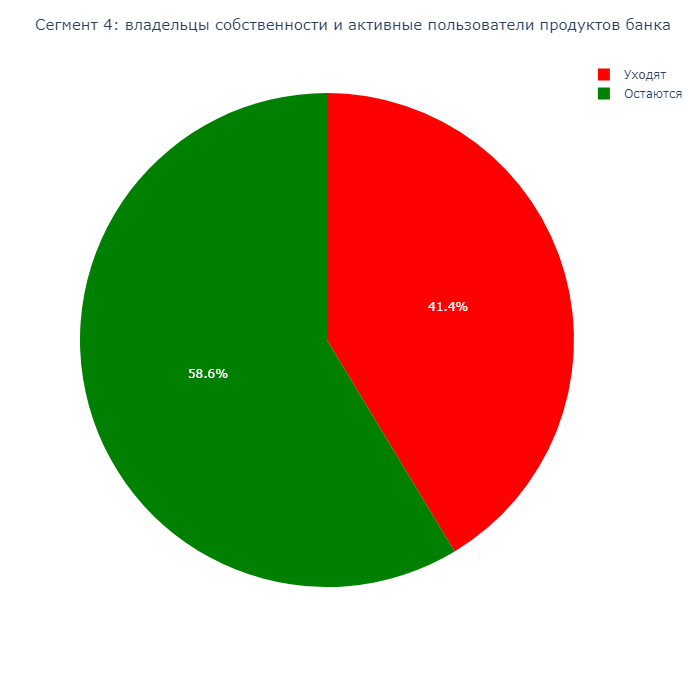

## Рекомендации для отдела маркетинга

Проанализировав особенности каждого сегмента, мы сформулировали следующие примеры услуг и акций, которые могли бы заинтересовать клиентов и остановить их от ухода из банка.


### Сегмент 1: молодые обеспеченные клиенты из Ярославля
Отметим, что отток этой категории клиентов может быть никак не связан с качеством услуг банка, а может объясняться социально-демографической ситуацией: молодые люди, накопив достаточную сумму денег, переезжают в другой крупный город (например, Москву). Тем не менее, можно попытаться удержать и таких клиентов:

1. Повышенный кэшбэк на авиабилеты, товары для детей.
2. Ипотечные кредиты с пониженной ставкой для молодых семей.
3. Автокредиты с пониженной ставкой.
4. Повышенные проценты по вкладам на крупную сумму.

### Сегмент 2: платежеспособные клиенты младше 50 лет без кредитной карты

1. Кредитная карта с повышенным лимитом.
2. Кредитная карта с увеличенным беспроцентным периодом.

### Сегмент 3: клиенты среднего возраста с большим балансом счета

1. Программы софинансирования пенсионных накоплений.
2. Страхование вкладов (в том числе от мошенничества).
3. Повышенный кэшбэк на операции, связанные с расходами на здоровье.
4. Повышенные проценты по вкладам на крупную сумму.


### Сегмент 4: владельцы собственности и активные пользователи продуктов банка

1. Дополнительное страхование объектов недвижимости.
2. Кредиты под залог недвижимости с пониженной ставкой или иными преимуществами.